## ÏßàÎ¨∏zip
---
- sns.factorplot('Pclass','Survived',hue='Sex',data=data) ÏóêÏÑú factorplotÏùÑ ÎçîÏù¥ÏÉÅ ÏßÄÏõêÌïòÏßÄ ÏïäÏïÑ ÎÇòÎäî catplotÏúºÎ°ú ÌïòÏòÄÎäîÎç∞ Îã§Î•∏ Í∑∏Î£®Îì§ÏùÄ Ïñ¥ÎñªÍ≤å ÌëúÌòÑÌñàÎäî ÏßÄ Í∂ÅÍ∏àÌïòÎã§.
- plt.close(2) Ïù¥Í±∏ ÌïòÎ©¥ catplot Í∑∏ÎûòÌîÑ Ï∂úÎ†•Ïù¥ Ïïà Îê®
- familsize Î∂ÄÎ∂ÑÏóêÏÑú ÌòºÏûê ÏûàÎäî Í≤ÉÏù¥ **Sex**ÎÇò **Pclass**ÏôÄ ÏÉÅÍ¥ÄÏóÜÏù¥ Ìï¥Î°≠Îã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.  Ïù¥Ìï¥Í∞Ä Ïïà ÎêúÎã§.
- KNNÏ∂úÎ†•Í≤∞Í≥ºÍ∞Ä Îã§Î•¥Í≤å ÎÇòÏò§ÎäîÎç∞ Îã§Î•∏ Í∑∏Î£®Îì§ÏùÄ Ïñ¥ÎñªÍ≤å ÎÇòÏò§ÎäîÏßÄ

## Part1: Exploratory Data Analysis(EDA)

In [224]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
data = pd.read_csv('train.csv')

In [226]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [227]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
data.isna().sum() # isnull() Í≥º Í∞ôÏùÄ Í≤∞Í≥º Ï∂úÎ†•

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [228]:
# age, cabin, embarked Í∞Ä nullÍ∞íÏùÑ Ìè¨Ìï®ÌïòÎØÄÎ°ú Ïù¥Î•º ÏàòÏ†ï.
# ÏàòÏ†ïÌïòÎäî ÏΩîÎìú Ïñ¥Îîî?

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## How many Survived??

In [230]:
# matplotlibÏôÄ seabornÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Survived (ÏÉùÏ°¥ Ïó¨Î∂Ä) Ïóê ÎåÄÌïú ÏãúÍ∞ÅÌôîÎ•º 2Í∞ÄÏßÄ ÌòïÌÉúÎ°ú Î≥¥Ïó¨Ï£ºÎäî ÏΩîÎìú

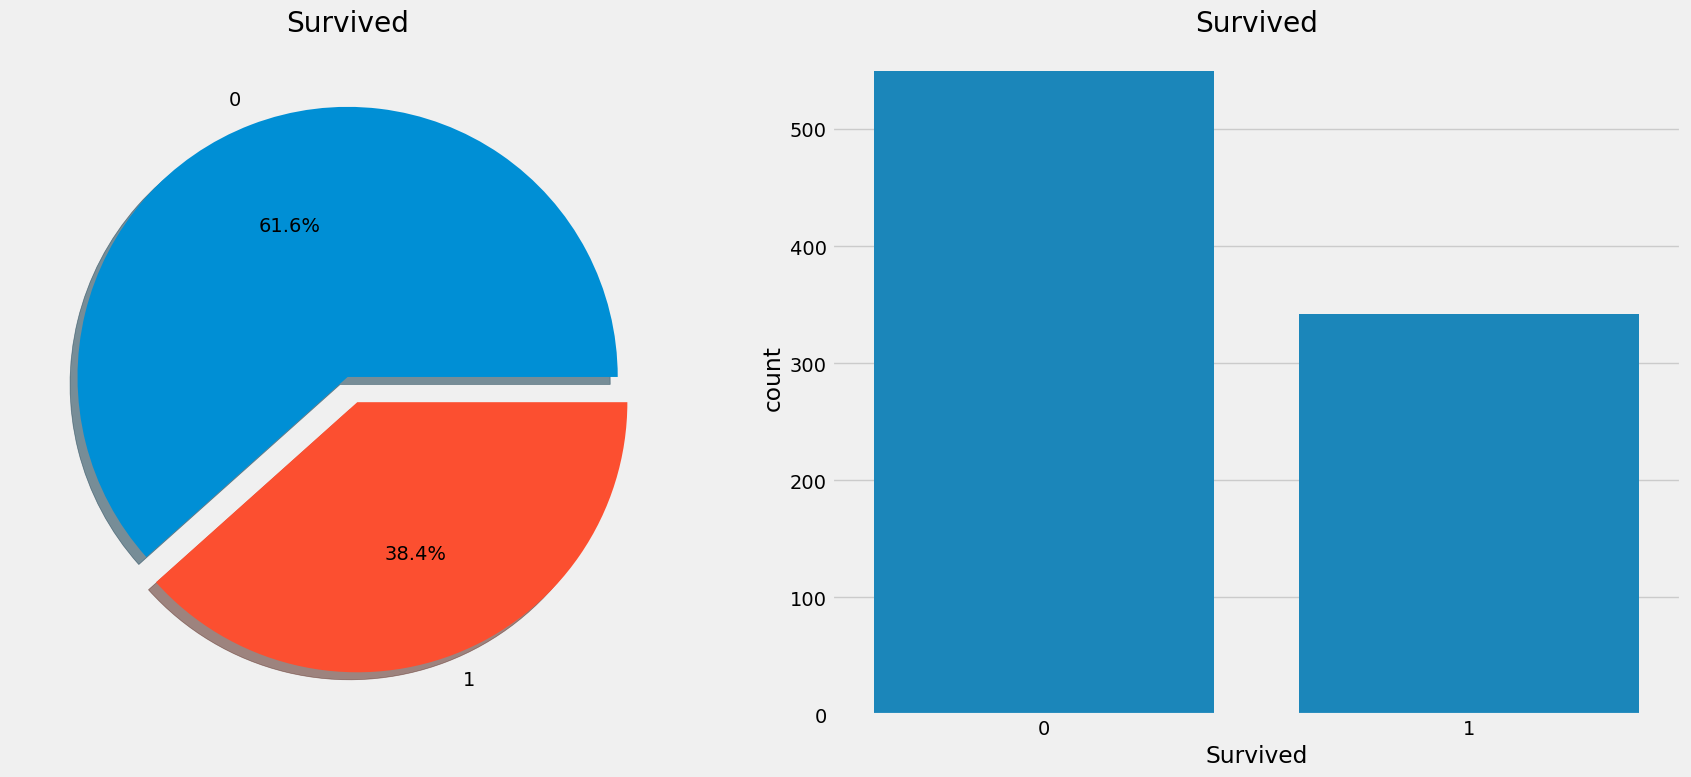

In [231]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# fÎäî Ï†ÑÏ≤¥ Í∞ùÏ≤¥, axÎäî Í∞Å subplotÏùò Ï∂ï(ax)Î•º Îã¥ÏùÄ Î¶¨Ïä§Ìä∏
# Îëê Í∞úÏùò Í∑∏ÎûòÌîÑÎ•º Ìï©ÏπòÎèÑÎ°ù subplots
# 1Ìñâ 2Ïó¥ ÌòïÌÉú

# ÏôºÏ™Ω: ÌååÏù¥ Ï∞®Ìä∏
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], # ÏÉùÏ°¥Ï™ΩÏùÑ ÏïΩÍ∞Ñ ÎùÑÏõåÏÑú 
    autopct='%.1f%%', # ÏÜåÏàòÏ†ê Ï≤´Ïß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
    ax=ax[0], # Ï≤´ Î≤àÏß∏ ax ÏöîÏÜåÏóê Í∑∏Î¶¨Í∏∞
    shadow=True # Í∑∏Î¶ºÏûê Í∞ÄÍ∞Ä
)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Ïò§Î•∏Ï™Ω: ÎßâÎåÄ Í∑∏ÎûòÌîÑ
sns.countplot(x='Survived', data=data, ax=ax[1])
# countplot Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º ÏÑ∏Ïñ¥ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî

ax[1].set_title('Survived')

f.tight_layout()
plt.show()

%.1f%% ÏóêÏÑú %%Î•º Îëê Î≤à ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†?  
%ÏûêÏ≤¥ÎèÑ Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï®

## Analysing The Features  
### Sex--> Categorical Feature

In [232]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

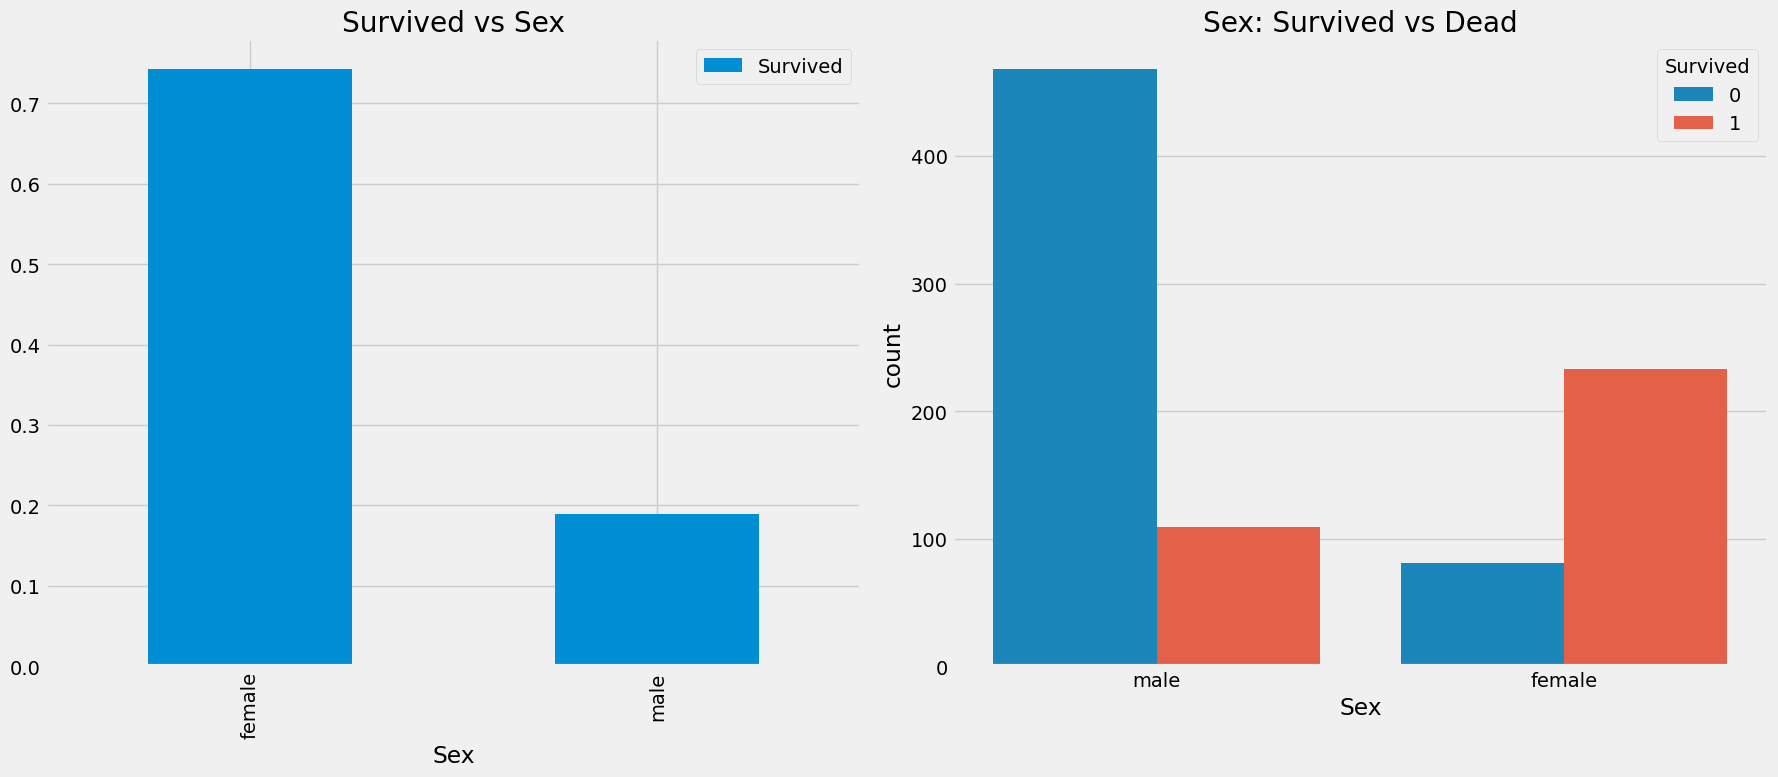

In [233]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
# hue ÏÉâÍπîÎ°ú Í∑∏Î£πÏùÑ ÎÇòÎàÑÎäî Í∏∞Ï§Ä
ax[1].set_title('Sex: Survived vs Dead')

f.tight_layout()
plt.show()


‚úîÔ∏è countplotÏùÄ "Í∞Å ÏÉùÏ°¥ Ïó¨Î∂ÄÏóê ÎåÄÌïú Í∞úÏàòÎßå ÏãúÍ∞ÅÌôî" Ìï¥Ï§Ñ Îøê, Ï†ÑÏ≤¥ ÏàòÎäî Îî∞Î°ú Ïïà Î≥¥Ïó¨Ï§ÄÎã§.

Î∞∞Ïóê ÌÉëÏäπÌïú ÎÇ®ÏÑ±Ïùò ÏàòÍ∞Ä Ïó¨ÏÑ±Î≥¥Îã§ Ìõ®Ïî¨ ÎßéÏäµÎãàÎã§.  
Í∑∏Îü∞Îç∞ÎèÑ Íµ¨Ï°∞Îêú Ïó¨ÏÑ±Ïùò ÏàòÎäî ÎÇ®ÏÑ±Î≥¥Îã§ Í±∞Ïùò Îëê Î∞∞Ïóê Îã¨ÌïúÎã§.  
Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Î•†ÏùÄ ÏïΩ **75%**Ïù∏ Î∞òÎ©¥, ÎÇ®ÏÑ±ÏùÄ 18~19% Ï†ïÎèÑÏù¥Îã§.  
  
Ïù¥Í±¥ Î™®Îç∏ÎßÅÏóê ÏïÑÏ£º Ï§ëÏöîÌïú ÌäπÏßï(ÌîºÏ≤ò)Ï≤òÎüº Î≥¥Ïù∏Îã§.  
Îã§Î•∏ ÌîºÏ≤òÎì§ÎèÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†Îã§.


## Pclass --> Ordinal Feature

In [234]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')
# margins = True ÌñâÍ≥º Ïó¥Ïùò Ï¥ùÌï©(All)ÏùÑ Í∞ôÏù¥ Î≥¥Ïó¨Ï§ÄÎã§.
# style.background_gradient DataFrameÏóê ÏÉâÏÉÅ Í∑∏ÎùºÎîîÏñ∏Ìä∏Î•º ÏûÖÌòÄÏÑú Ïà´Ïûê ÌÅ¨Í∏∞Î•º ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥¥Ïù¥Í≤å Ìï¥Ï§ÄÎã§.
# cmap='summer_r' ÎÖ∏Îûë~Ïó∞ÎëêÎ°ú Î∞òÎåÄÎ°ú Ï†ÅÏö©Îê®(color)

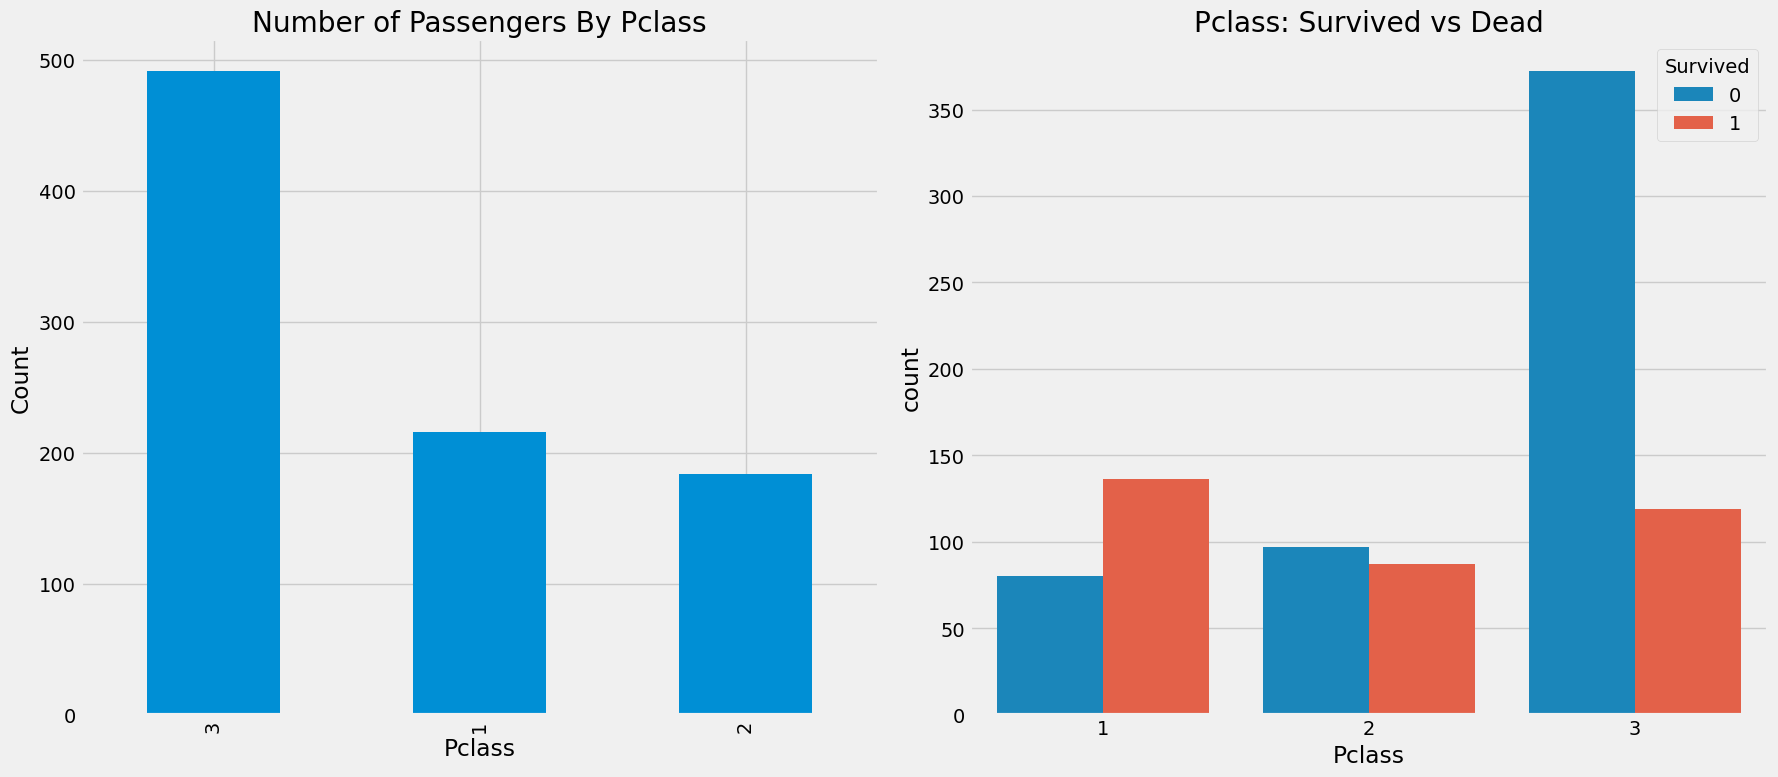

In [235]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

f.tight_layout()
plt.show()

üîç Ïù∏ÏÇ¨Ïù¥Ìä∏  
PclassÏôÄ ÏÉùÏ°¥Î•† Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Î©¥, 1Îì±ÏÑù ÏäπÍ∞ùÏùò ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÍ≥†, 3Îì±ÏÑùÏùÄ ÎÇÆÏùÄ Í≤ΩÌñ•Ïù¥ ÎöúÎ†∑ÌïòÍ≤å ÎÇòÌÉÄÎÇúÎã§.  

Îî∞ÎùºÏÑú, ÌÉÄÏù¥ÌÉÄÎãâ ÏÇ¨Í≥† ÎãπÏãú Î∂ÄÏú†Ìïú ÏÇ¨ÎûåÎì§Ïù¥ Íµ¨Ï°∞ Ïö∞ÏÑ†Í∂åÏùÑ Î∂ÄÏó¨Î∞õÏïòÍ≥†,  
ÏÉÅÎ•òÏ∏µÏùò ÏÉùÏ°¥Ïú®Ïù¥ ÎÜíÏïòÎã§Îäî ÏÇ¨ÌöåÏ†Å, Í≤ΩÏ†úÏ†Å Î∂àÌèâÎì±ÏùÑ Î∞òÏòÅÌïòÎäî Ï§ëÏöîÌïú Ïù∏ÏÇ¨Ïù¥Ìä∏Í∞Ä Îê† Ïàò ÏûàÎã§.

In [236]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

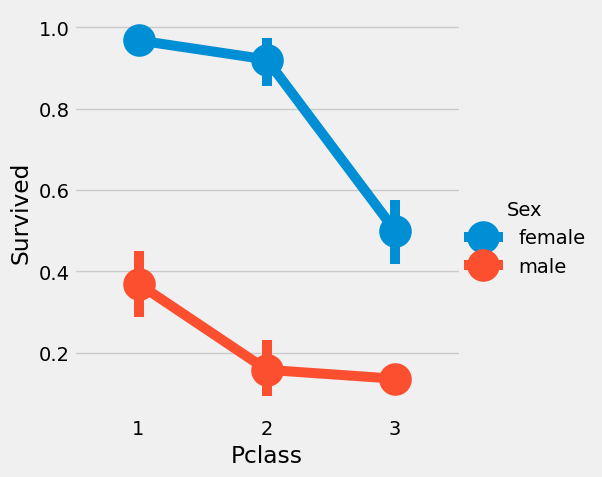

In [237]:
# sns.factorplot('Pclass','Survived',hue='Sex',data=data)
# ÎçîÏù¥ÏÉÅ factorplotÏùÑ ÏßÄÏõêÌïòÏßÄ ÏïäÏïÑ catplotÏúºÎ°ú ÌëúÌòÑ

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

üîç Ïù∏ÏÇ¨Ïù¥Ìä∏  
PclassÏôÄ Í¥ÄÍ≥ÑÏóÜÏù¥, Ïó¨ÏÑ±ÏùÄ Íµ¨Ï°∞ Ïãú Ïö∞ÏÑ†Í∂åÏùÑ Î∞õÏïòÎã§Îäî Í≤ÉÏù¥ Î∂ÑÎ™ÖÌïòÎã§.  
Pclass 1Ïùò ÎÇ®ÏÑ±Îì§Ï°∞Ï∞® ÏÉùÏ°¥Ïú®Ïù¥ Îß§Ïö∞ ÎÇÆÎã§.    
PclassÎèÑ Ï§ëÏöîÌïú ÌäπÏßïÏù∏ Í≤É Í∞ôÎã§.  
ÏÑ±Î≥ÑÍ≥º PclassÍ∞Ä Íµ¨Ï°∞ Ïãú ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÏïòÎã§Îäî Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌï† Ïàò ÏûàÎã§.

## Age--> Continous Feature

In [238]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',round(data['Age'].mean(),2),'Years') # ÎÇòÏù¥ÎùºÏÑú ÏÜåÏàòÏ†ê ÎëòÏß∏ÏûêÎ¶¨ ÍπåÏßÄ ÎÇòÏò§Í≤å Ï∂úÎ†•Ìï®

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


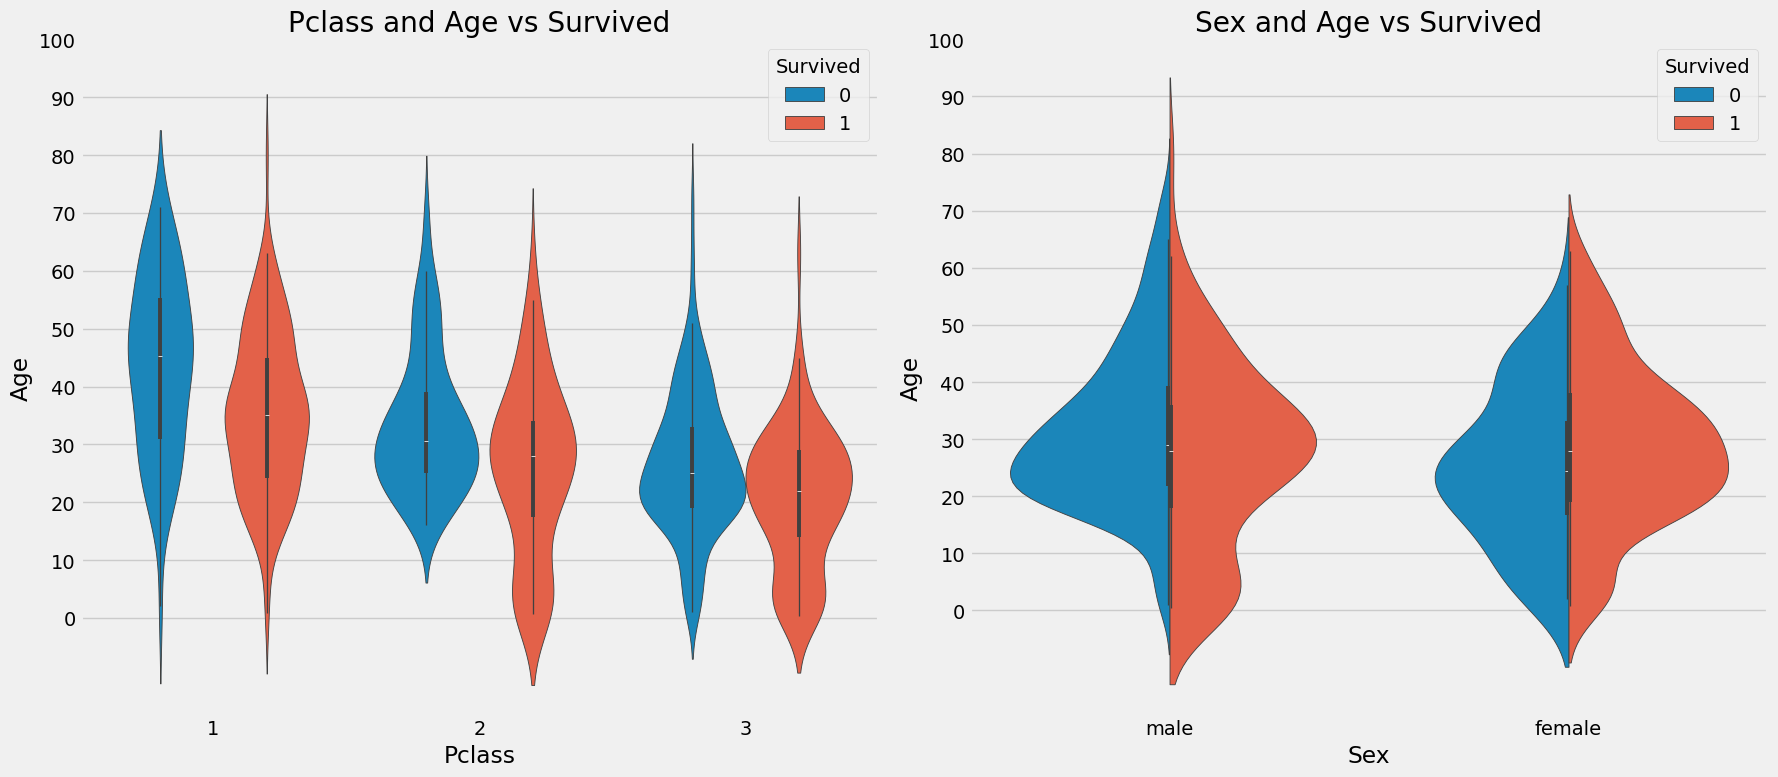

In [239]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # 110ÍπåÏßÄ 10Ïî© Ï¶ùÍ∞Ä -> 100ÍπåÏßÄ Ï∂ú

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

f.tight_layout()
plt.show()

üîç Ïù∏ÏÇ¨Ïù¥Ìä∏  
ÎÇòÏù¥Í∞Ä Ïñ¥Î¶∞ Ïñ¥Î¶∞Ïù¥Îì§ÏùÄ PclassÏôÄ Í¥ÄÍ≥ÑÏóÜÏù¥ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÜíÎã§.  
Ïñ¥Î¶∞Ïù¥Î•º Î®ºÏ†Ä Íµ¨Ï°∞ÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.

Age Ïª¨ÎüºÏóêÎäî Ï¥ù 177Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎ©∞, Îã®ÏàúÌûà Ï†ÑÏ≤¥ ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Î∞©ÏãùÏùÄ Î∂ÄÏ†ÅÏ†àÌï† Ïàò ÏûàÎã§.  
ÏòàÎ•º Îì§Ïñ¥, Ïñ¥Î¶∞Ïù¥ÏóêÍ≤å Ï†ÑÏ≤¥ ÌèâÍ∑† ÎÇòÏù¥Ïù∏ 29ÏÑ∏Î•º ÎÑ£Îäî Í≤ÉÏùÄ ÎπÑÌòÑÏã§Ï†ÅÏù¥Îã§.  
  
Ïù¥Î•º Î≥¥ÏôÑÌïòÍ∏∞ ÏúÑÌï¥ Name Ïª¨ÎüºÏùÑ ÌôúÏö©Ìïú Î∞©Î≤ïÏù¥ Ï†úÏïàÎêúÎã§.  
NameÏóêÎäî "Mr", "Mrs", "Miss", "Master" Îì± Ìò∏Ïπ≠(title)Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ ÏäπÍ∞ùÏùò ÏÑ±Î≥ÑÍ≥º ÎåÄÎûµÏ†ÅÏù∏ ÎÇòÏù¥ÎåÄÎ•º Ïú†Ï∂îÌï† Ïàò ÏûàÎã§.  
- "Mr"Îäî Î≥¥ÌÜµ ÏÑ±Ïù∏ ÎÇ®ÏÑ±
- "Mrs"Îäî Í∏∞Ìòº Ïó¨ÏÑ±
- "Miss"Îäî ÎØ∏Ìòº Ïó¨ÏÑ± ÎòêÎäî Ïñ¥Î¶∞ ÏÜåÎÖÄ
- "Master"Îäî Ïñ¥Î¶∞ ÎÇ®ÏûêÏïÑÏù¥Î•º ÏùòÎØ∏ÌïúÎã§.

In [240]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Ï†ïÍ∑úÌëúÌòÑÏãù '([A-Za-z]+)\.' ÏùòÎØ∏  
(...): Í¥ÑÌò∏ ÏïàÏùÄ Ï∂îÏ∂ú ÎåÄÏÉÅ Ï¶â, Ïù¥ ÏïàÏóê Ìï¥ÎãπÎêòÎäî Î¨∏ÏûêÏó¥ÏùÑ ÎΩëÍ≤†Îã§Îäî ÎúªÏù¥Îã§.  
  
`[A-Za-z]`: ÎåÄÎ¨∏Ïûê AZ, ÏÜåÎ¨∏Ïûê az Ï§ë ÌïòÎÇòÏùò Î¨∏ÏûêÎ•º ÏùòÎØ∏ÌïúÎã§.  
`+`: ÏïûÏùò [A-Za-z]Í∞Ä 1Í∞ú Ïù¥ÏÉÅ Î∞òÎ≥µÎêúÎã§Îäî ÎúªÏù¥Îã§.  
`\.`: .ÏùÄ ÏõêÎûò Ï†ïÍ∑úÏãùÏóêÏÑú "Î™®Îì† Î¨∏Ïûê"Î•º ÎúªÌïòÎäî ÌäπÏàòÎ¨∏ÏûêÎùºÏÑú, ÏßÑÏßú ÎßàÏπ®Ìëú(.)Î•º ÏùòÎØ∏ÌïòÎ†§Î©¥ `\.`Ï≤òÎüº Î∞±Ïä¨ÎûòÏãúÎ°ú Ïù¥Ïä§ÏºÄÏù¥ÌîÑÌï¥Ïïº ÌïúÎã§.  
- "Smith, Mr. John" ‚Üí 'Mr'
- "Brown, Mrs. Clara" ‚Üí 'Mrs'

In [241]:
data.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [242]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
# .T ÌñâÍ≥º Ïó¥ÏùÑ Î∞îÍøîÏ£ºÎäî Ïó≠Ìï†

replaceÌï®ÏàòÎ•º Î∞∞Ïö∏ Îïå ÎîïÏÖîÎÑàÎ¶¨ ÌòïÏãùÏúºÎ°ú Î∞∞ÏõåÏÑú Î¶¨Ïä§Ìä∏ ÌòïÏãùÏùò Î≥ÄÌôòÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥ÏïòÎã§.

‚ú® Tip  
- Î¶¨Ïä§Ìä∏ Î∞©Ïãù  
‚Üí Î∞îÍøÄ Í∞íÏù¥ ÎßéÍ≥†, 1:1 Îß§Ïπ≠Ïù¥ ÍπîÎÅîÌïòÍ≤å Îê† Îïå  
‚Üí Ïòà: Ìò∏Ïπ≠Ïù¥ÎÇò ÎùºÎ≤® Îì± Í∑úÏπôÏ†ÅÏúºÎ°ú ÏπòÌôòÌï† Îïå  
‚Üí ['A', 'B', 'C'], ['X', 'Y', 'Z']  
  
- ÎîïÏÖîÎÑàÎ¶¨ Î∞©Ïãù  
‚Üí Î∞îÍøÄ Í∞íÏù¥ Ï†ÅÍ≥†, ÏùΩÍ∏∞ ÏâΩÍ≤å ÌëúÌòÑÌïòÍ≥† Ïã∂ÏùÑ Îïå  
‚Üí Ïòà: Î™á Í∞úÎßå ÌäπÏ†ï Í∞íÏúºÎ°ú Î∞îÍøîÏ§Ñ Îïå  
‚Üí {'A': 'X', 'B': 'Y'}

In [243]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [244]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [245]:
## Assigning the NaN Values with the Ceil values of the mean ages
# for i in range(len(data['Age'])):
#     if data['Age'].isna().iloc[i]:  # AgeÍ∞Ä NaNÏù∏ Í≤ΩÏö∞Îßå ÌôïÏù∏
#         if data['Initial'].iloc[i] == 'Mr':
#             data.loc[i, 'Age'] = 33
#         elif data['Initial'].iloc[i] == 'Mrs':
#             data.loc[i, 'Age'] = 36
#         elif data['Initial'].iloc[i] == 'Master':
#             data.loc[i, 'Age'] = 5
#         elif data['Initial'].iloc[i] == 'Miss':
#             data.loc[i, 'Age'] = 22
#         elif data['Initial'].iloc[i] == 'Other':
#             data.loc[i, 'Age'] = 46


data.loc[(data.Age.isna())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isna())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isna())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isna())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isna())&(data.Initial=='Other'),'Age']=46

=> ÏÑ±Îä•ÏùÑ Í≥†Î†§ÌïòÎ©¥ Î≤°ÌÑ∞ÌôîÎêú ÏΩîÎìúÍ∞Ä Ìõ®Ïî¨ Îçî Ìö®Ïú®Ï†ÅÏù¥Í≥† Îπ†Î•¥Í∏∞ ÎïåÎ¨∏Ïóê, Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä ÌÅ¨Í±∞ÎÇò ÏÑ±Îä•Ïù¥ Ï§ëÏöîÌïú Í≤ΩÏö∞ÏóêÎäî Î≤°ÌÑ∞ÌôîÎêú ÏΩîÎìúÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
Î∞òÎ≥µÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÄ ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ÎÇò Í∞ÑÎã®Ìïú Ï≤òÎ¶¨Ïóê Ï†ÅÌï©ÌïòÏßÄÎßå, ÏÑ±Îä•Ïù¥ Ï§ëÏöîÌïú ÏÉÅÌô©ÏóêÏÑúÎäî Î≤°ÌÑ∞ÌôîÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî ÎÇòÏùÄ ÏÑ†ÌÉùÏûÖÎãàÎã§.

Î≤°ÌÑ∞Ìôî(Vectorization)
- Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ÏóêÏÑú Îß§Ïö∞ Ï§ëÏöîÌïú Í∞úÎÖêÏúºÎ°ú, Îç∞Ïù¥ÌÑ∞Î•º Î∞òÎ≥µÎ¨∏ ÏóÜÏù¥ Ìïú Î≤àÏóê Ï≤òÎ¶¨ÌïòÎäî Î∞©Ïãù  
-  ÌäπÌûà, pandasÏôÄ Í∞ôÏùÄ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï†úÍ≥µÌïòÎäî Î≤°ÌÑ∞ÌôîÎêú Ïó∞ÏÇ∞ÏùÄ Î∞òÎ≥µÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÎ≥¥Îã§ Ìõ®Ïî¨ Ìö®Ïú®Ï†Å  
- Î≤°ÌÑ∞ÌôîÎäî ÏÑ±Îä• Ìñ•ÏÉÅÎøêÎßå ÏïÑÎãàÎùº ÏΩîÎìúÏùò Í∞ÑÍ≤∞ÏÑ±ÎèÑ Í∞ÄÏ†∏Ïò¥

‚úÖisnull() vs isna() Ï∞®Ïù¥Ï†êÏùÄ?
  
isnull(): ÏõêÎûòÎ∂ÄÌÑ∞ ÏûàÏóàÎçò Ìï®Ïàò  
isna(): ÎÇòÏ§ëÏóê Ï∂îÍ∞ÄÎêú Îçî ÏßÅÍ¥ÄÏ†ÅÏù∏ Ïù¥Î¶Ñ  

In [246]:
data.Age.isna().any()

False

In [247]:
data['Survived'].max()

1

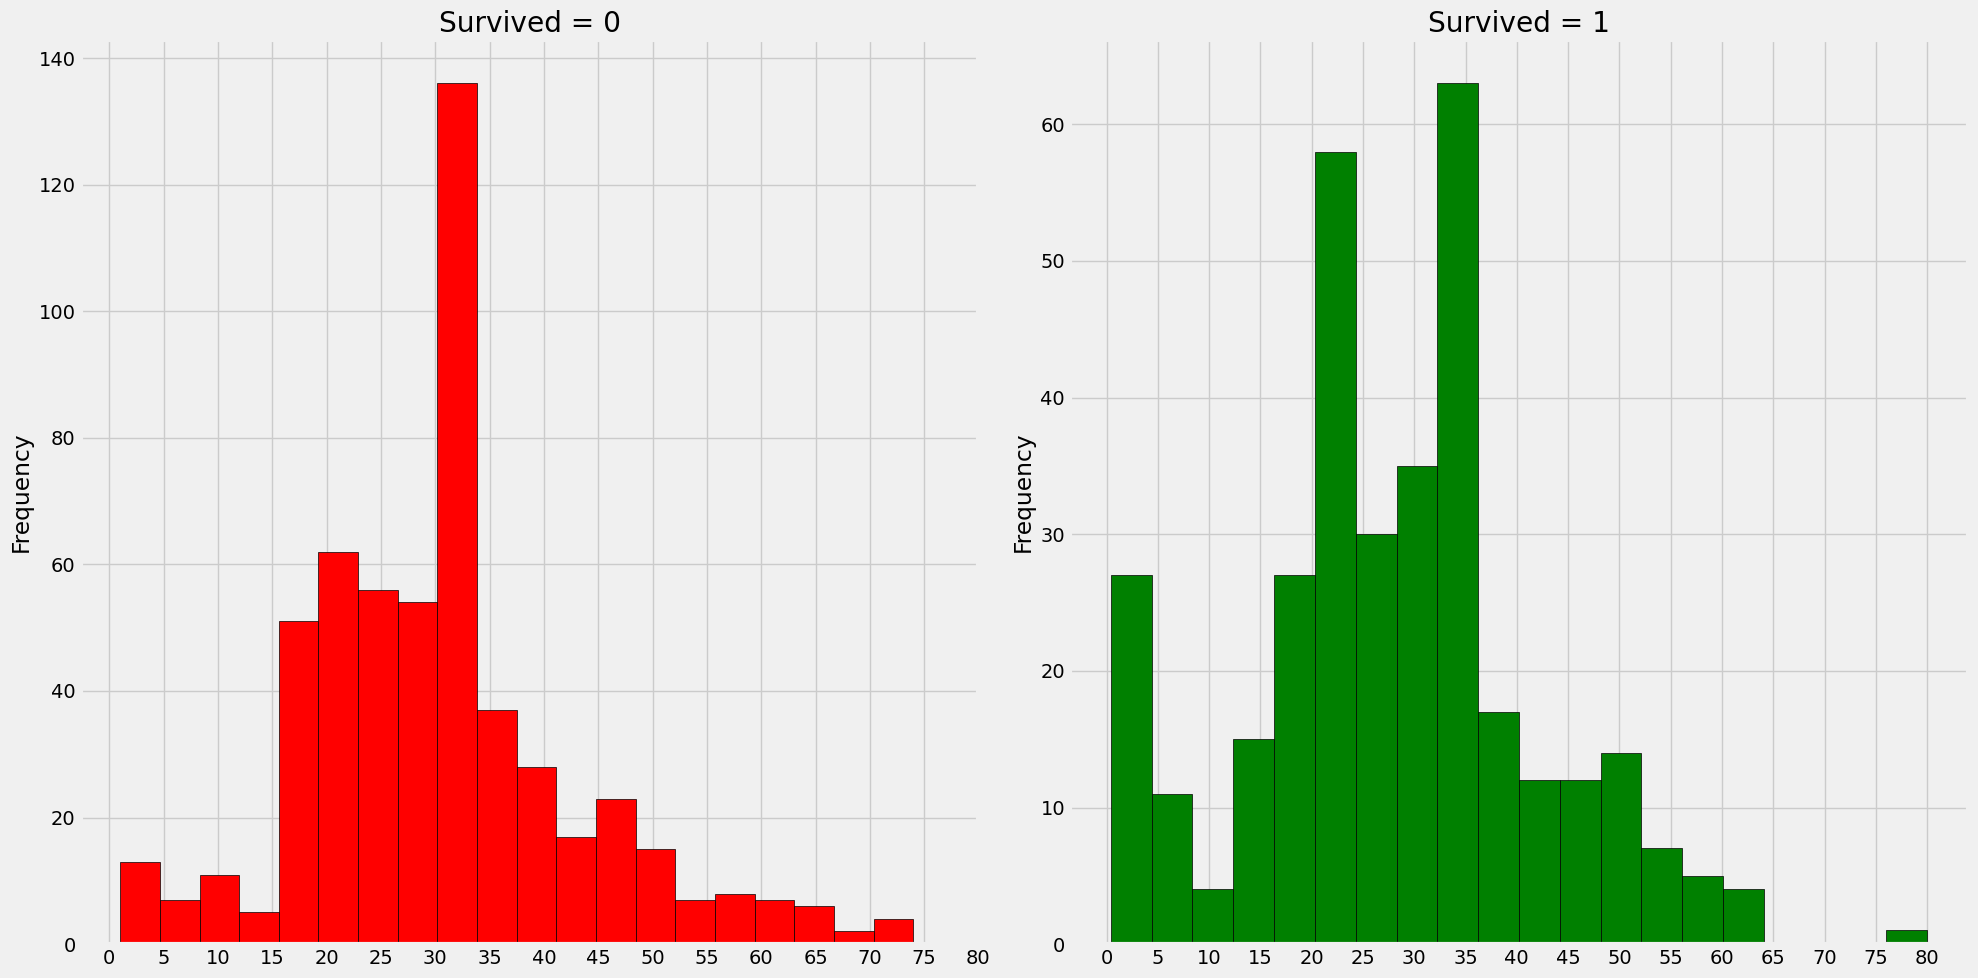

In [248]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x = list(range(0,85,5))
ax[0].set_xticks(x) # xÏ∂ï Íµ¨Í∞Ñ

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2) # xÏ∂ï Íµ¨Í∞Ñ

f.tight_layout()
plt.show()

Q. xticks Ìï† Îïå Ïôú rangeÎ≤îÏúÑÎ•º list()Î°ú Í∞êÏã∏ÎäîÏßÄ?
  
range()Îäî Ïù¥ÌÑ∞Î†àÏù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù∏Îç±Ïã±, Ïä¨ÎùºÏù¥Ïã± Îì±Ïùò Ï≤òÎ¶¨Í∞Ä Î∂àÍ∞ÄÎä•  
set_xticks() Í∞ôÏùÄ Ìï®ÏàòÎäî Î≥¥ÌÜµ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ•º ÏöîÍµ¨ÌïòÎØÄÎ°ú list()Î°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†Å

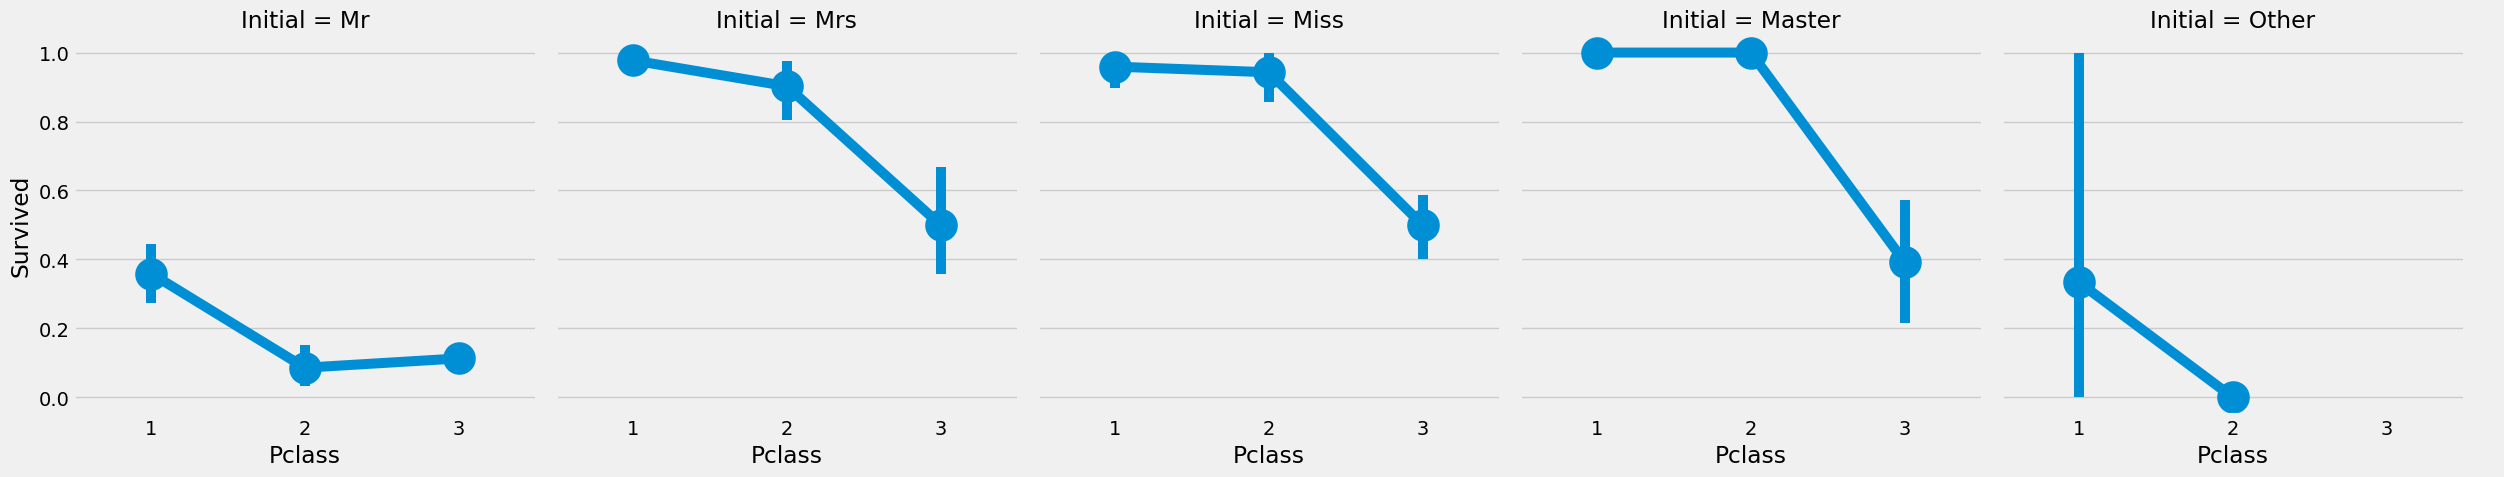

In [249]:
sns.catplot(x='Pclass',y='Survived', col='Initial', data=data, kind="point")
plt.show()

üîç Ïù∏ÏÇ¨Ïù¥Ìä∏  
'Ïó¨ÏÑ± Î∞è Ïñ¥Î¶∞Ïù¥ Î®ºÏ†Ä' Ï†ïÏ±ÖÏùÄ Í≥ÑÍ∏âÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ Í∑∏ÎåÄÎ°ú Ï†ÅÏö©ÎêúÎã§.

## Embarked--> Categorical Value

In [250]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [251]:
pd.crosstab([data.Embarked],[data.Survived],margins=True).style.background_gradient(cmap='summer_r')

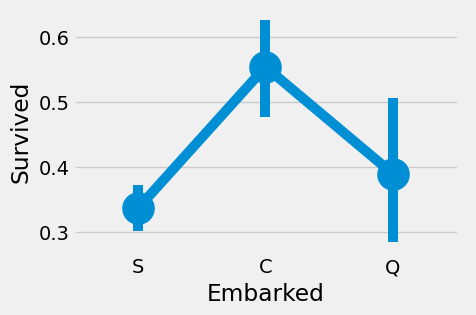

In [252]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf() # plt.gcf()Îäî ÌòÑÏû¨ ÌôúÏÑ±ÌôîÎêú matplotlibÏùò Í∑∏Î¶º Í∞ùÏ≤¥(figure)Î•º Í∞ÄÏ†∏Ïò®Îã§.
# Ïù¥ Í∞ùÏ≤¥Îäî Í∑∏ÎûòÌîÑÏùò ÌÅ¨Í∏∞ÎÇò ÏÜçÏÑ± Îì±ÏùÑ ÏàòÏ†ïÌï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.
fig.set_size_inches(5,3)
plt.show()

üîçÏÉùÏ°¥ ÏàòÎ°úÎßå Î≥¥Î©¥ S Ìï≠Íµ¨Í∞Ä Í∞ÄÏû• ÎßéÏïòÏßÄÎßå,  
ÎπÑÏú®Î°ú Î≥¥Îãà C Ìï≠Íµ¨Í∞Ä ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÜíÍ≥† S Ìï≠Íµ¨Í∞Ä ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Í∞ÄÏû• ÎÇÆÎã§.

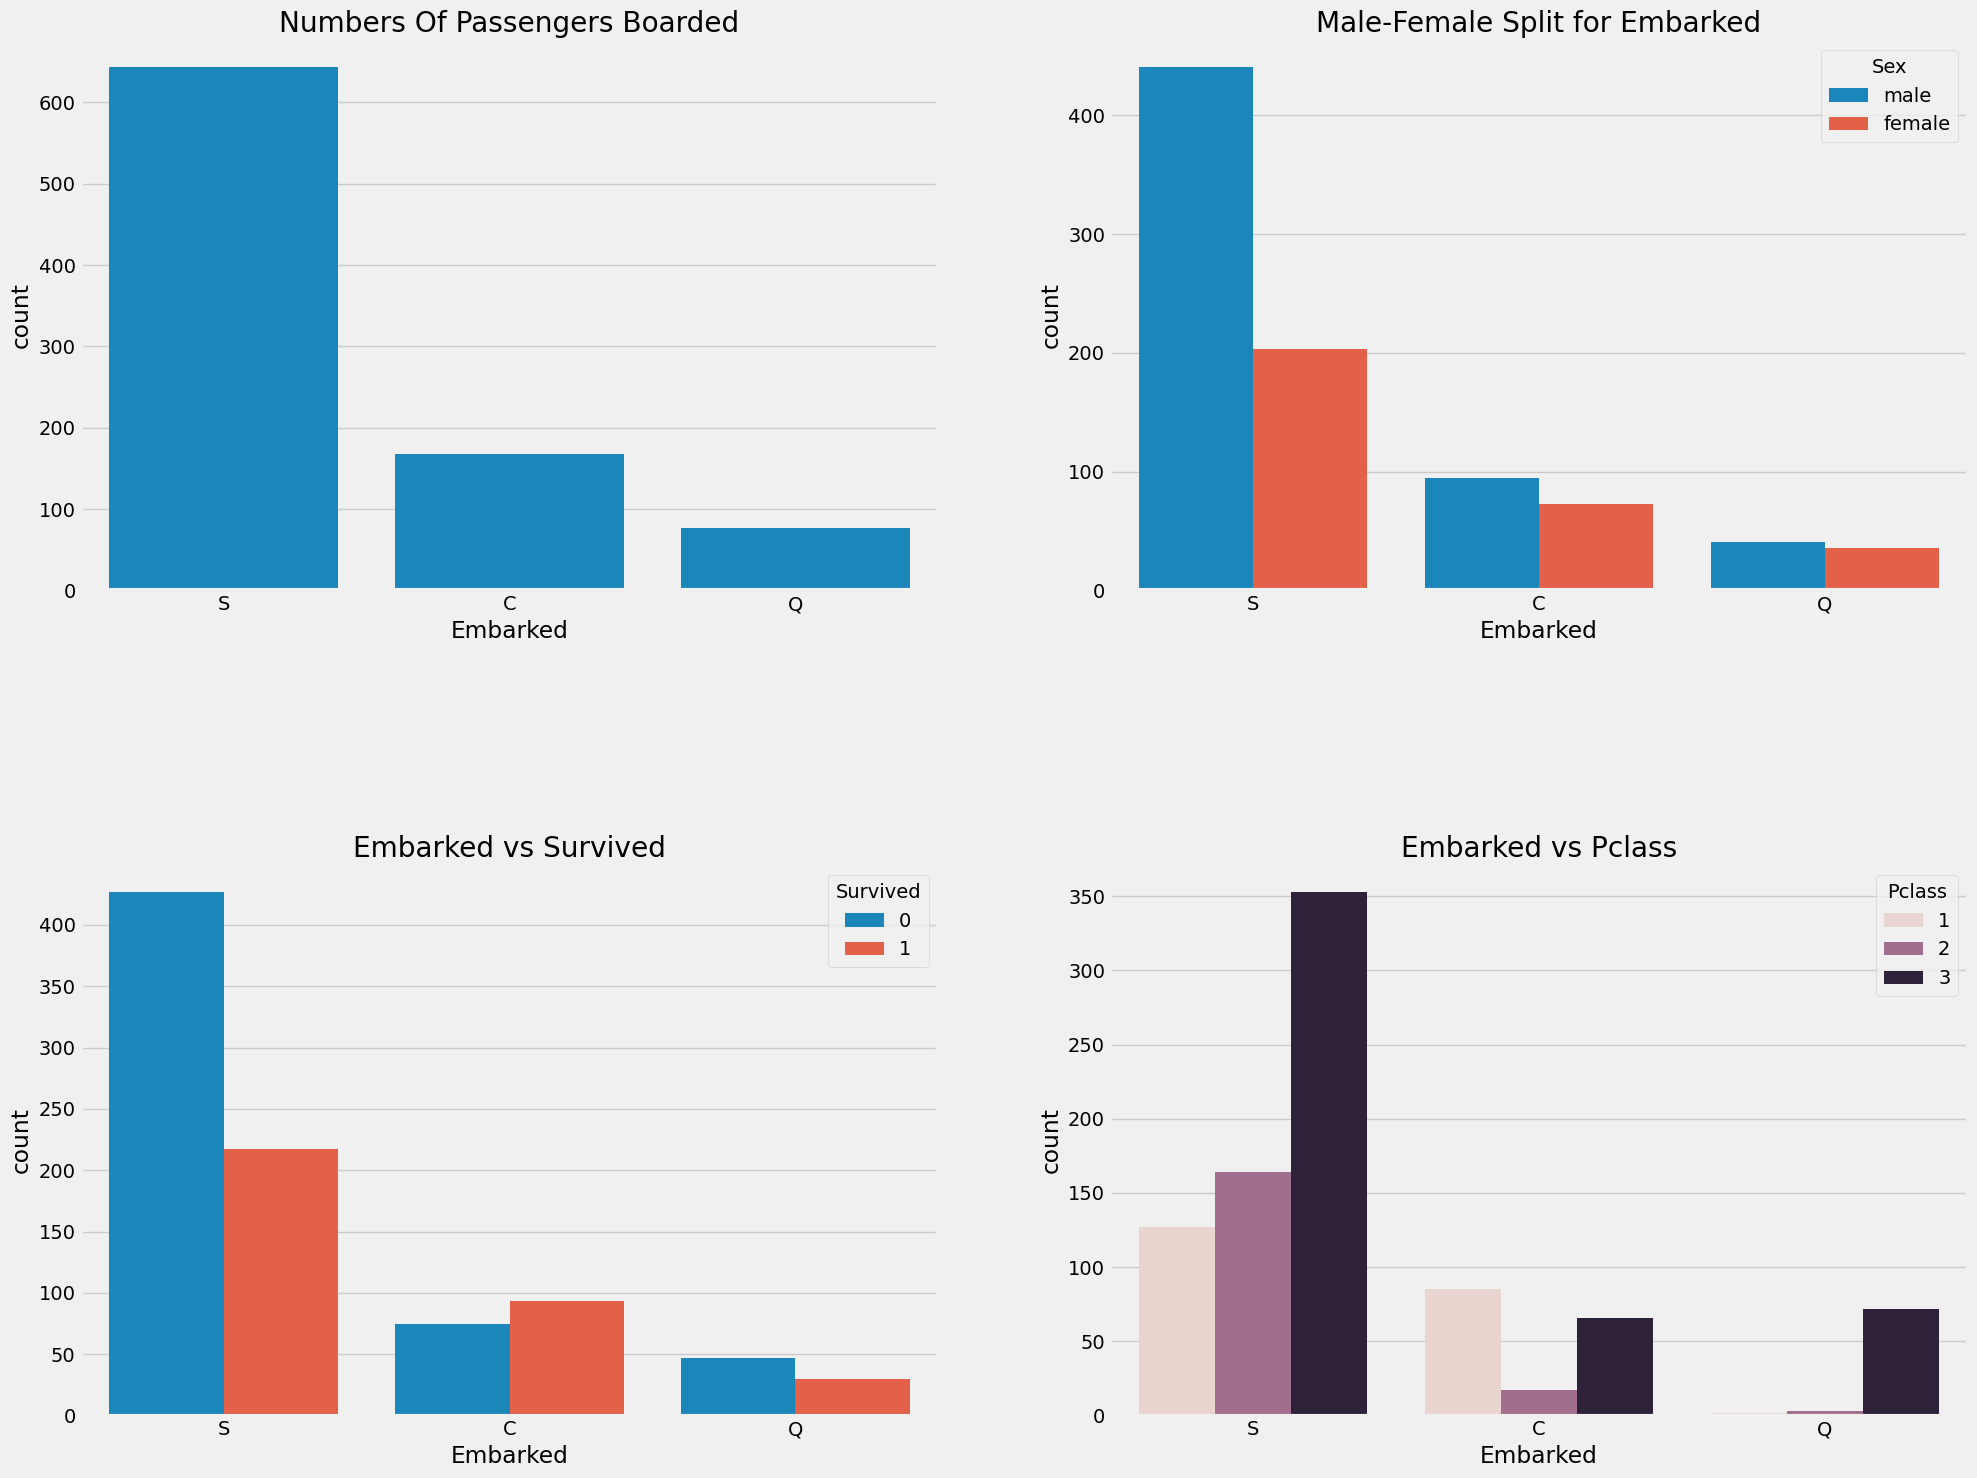

In [253]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Numbers Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

f.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- wspace ‚Üí ÏÑúÎ∏åÌîåÎ°Ø ÏÇ¨Ïù¥Ïùò Í∞ÄÎ°ú Í∞ÑÍ≤© (width space)  
Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∑∏ÎûòÌîÑÎì§ ÏÇ¨Ïù¥Ïùò Í∞ÄÎ°ú Í∞ÑÍ≤©Ïù¥ ÎÑìÏñ¥ÏßëÎãàÎã§.
  
- hspace ‚Üí ÏÑúÎ∏åÌîåÎ°Ø ÏÇ¨Ïù¥Ïùò ÏÑ∏Î°ú Í∞ÑÍ≤© (height space)  
Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∑∏ÎûòÌîÑÎì§ ÏÇ¨Ïù¥Ïùò ÏÑ∏Î°ú Í∞ÑÍ≤©Ïù¥ ÎÑìÏñ¥ÏßëÎãàÎã§.

üìå Observations (Í¥ÄÏ∞∞ ÎÇ¥Ïö©)  
S Ìï≠Íµ¨ÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ ÏäπÍ∞ùÏù¥ ÌÉëÏäπÌñàÏúºÎ©∞, Ïù¥Îì§ Ï§ë ÎåÄÎã§ÏàòÍ∞Ä 3Îì±Í∏â(Pclass3) ÏäπÍ∞ùÏù¥ÏóàÎã§.

C Ìï≠Íµ¨ÏóêÏÑú ÌÉëÏäπÌïú ÏäπÍ∞ùÎì§ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÉùÏ°¥Ïú®Ïù¥ ÎÜíÏïòÎã§.
‚Üí Ïù¥Îäî 1Îì±Í∏âÍ≥º 2Îì±Í∏â ÏäπÍ∞ùÎì§Ïù¥ Íµ¨Ï°∞Îêú Í≤ΩÏö∞Í∞Ä ÎßéÏïòÍ∏∞ ÎïåÎ¨∏Ïùº Ïàò ÏûàÎã§.

S Ìï≠Íµ¨Îäî Î∂ÄÏú†Ìïú ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÏù¥ ÌÉëÏäπÌïú Ìï≠Íµ¨Ï≤òÎüº Î≥¥Ïù∏Îã§.
‚Üí Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÏÉùÏ°¥Ïú®ÏùÄ ÎÇÆÏïòÎäîÎç∞, Ïù¥Îäî 3Îì±Í∏â ÏäπÍ∞ùÏùò ÏïΩ 81%Í∞Ä ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

Q Ìï≠Íµ¨ÏóêÏÑúÎäî **ÏäπÍ∞ùÏùò ÏïΩ 95%Í∞Ä 3Îì±Í∏â(Pclass3)**Ïù¥ÏóàÎã§.

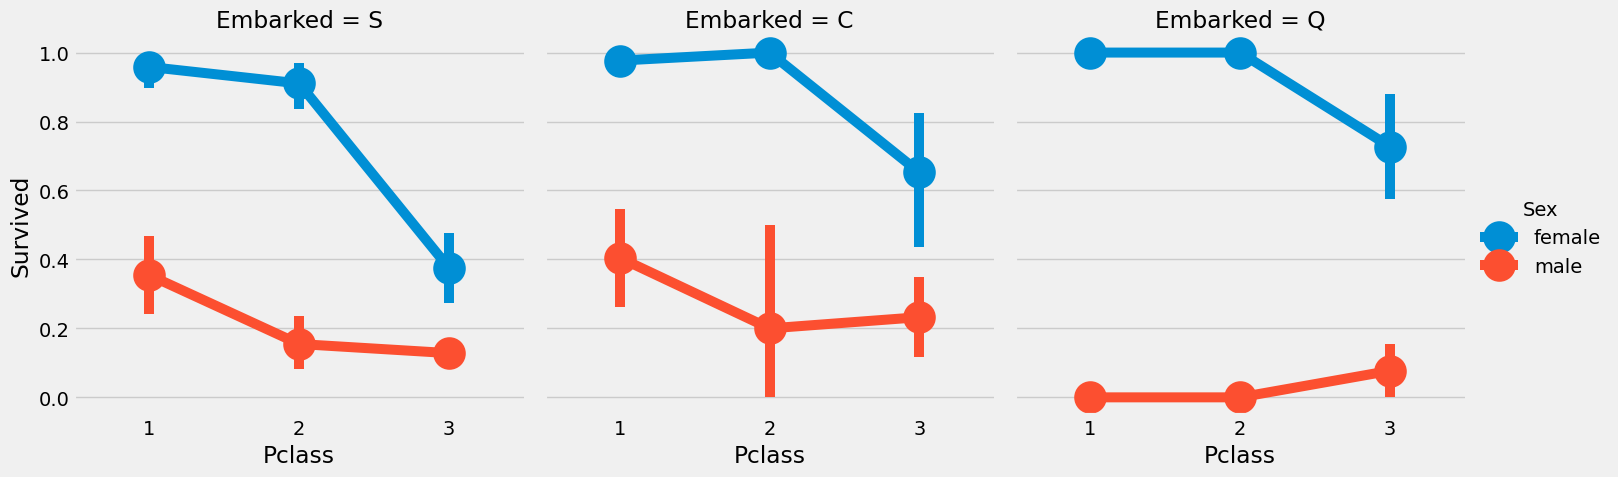

In [254]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

üìå Observations (Í¥ÄÏ∞∞ ÎÇ¥Ïö©)  
1Îì±Í∏â(Pclass1) Î∞è 2Îì±Í∏â(Pclass2) Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥ ÌôïÎ•†ÏùÄ Í±∞Ïùò 1Ïóê Í∞ÄÍπåÏö∞Î©∞, Ïù¥Îäî Îì±Í∏âÍ≥º Í¥ÄÍ≥ÑÏóÜÏù¥ Ïó¨ÏÑ±Ïù¥ÎùºÎäî Ï†êÏù¥ ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏùåÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.

S Ìï≠Íµ¨ÏóêÏÑú Ï∂úÎ∞úÌïú 3Îì±Í∏â ÏäπÍ∞ù(Pclass3) ÏùÄ Îß§Ïö∞ Î∂àÏö¥ÌñàÏúºÎ©∞,
‚Üí ÌäπÌûà ÎÇ®ÏÑ±Í≥º Ïó¨ÏÑ± Î™®ÎëêÏùò ÏÉùÏ°¥Ïú®Ïù¥ Îß§Ïö∞ ÎÇÆÏïòÎã§.  
‚Üí Ïù¥Îäî "ÎèàÏù¥ ÏÉùÏ°¥ÏùÑ Ï¢åÏö∞ÌñàÎã§(Money Matters)"Îäî Ï†êÏùÑ ÏãúÏÇ¨ÌïúÎã§.

Q Ìï≠Íµ¨Îäî ÎÇ®ÏÑ±Îì§ÏóêÍ≤å Í∞ÄÏû• Î∂àÏö¥Ìïú Ìï≠Íµ¨Î°ú Î≥¥Ïù∏Îã§.
‚Üí Í±∞Ïùò Î™®Îì† ÎÇ®ÏÑ± ÏäπÍ∞ùÏù¥ 3Îì±Í∏â ÏäπÍ∞ùÏù¥ÏóàÍ≥†, ÏÉùÏ°¥Î•†ÎèÑ ÎÇÆÏïòÎã§.

## Filling Embarked NaN

In [255]:
data['Embarked'].fillna('S',inplace=True)
# Í∞ÄÏû• ÎßéÏùÄ ÏäπÍ∞ùÏù¥ ÌÉëÏäπÌïú S Ìï≠Íµ¨(Port S) Î°ú ÎåÄÏ≤¥Ìï®.

In [256]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature

In [257]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

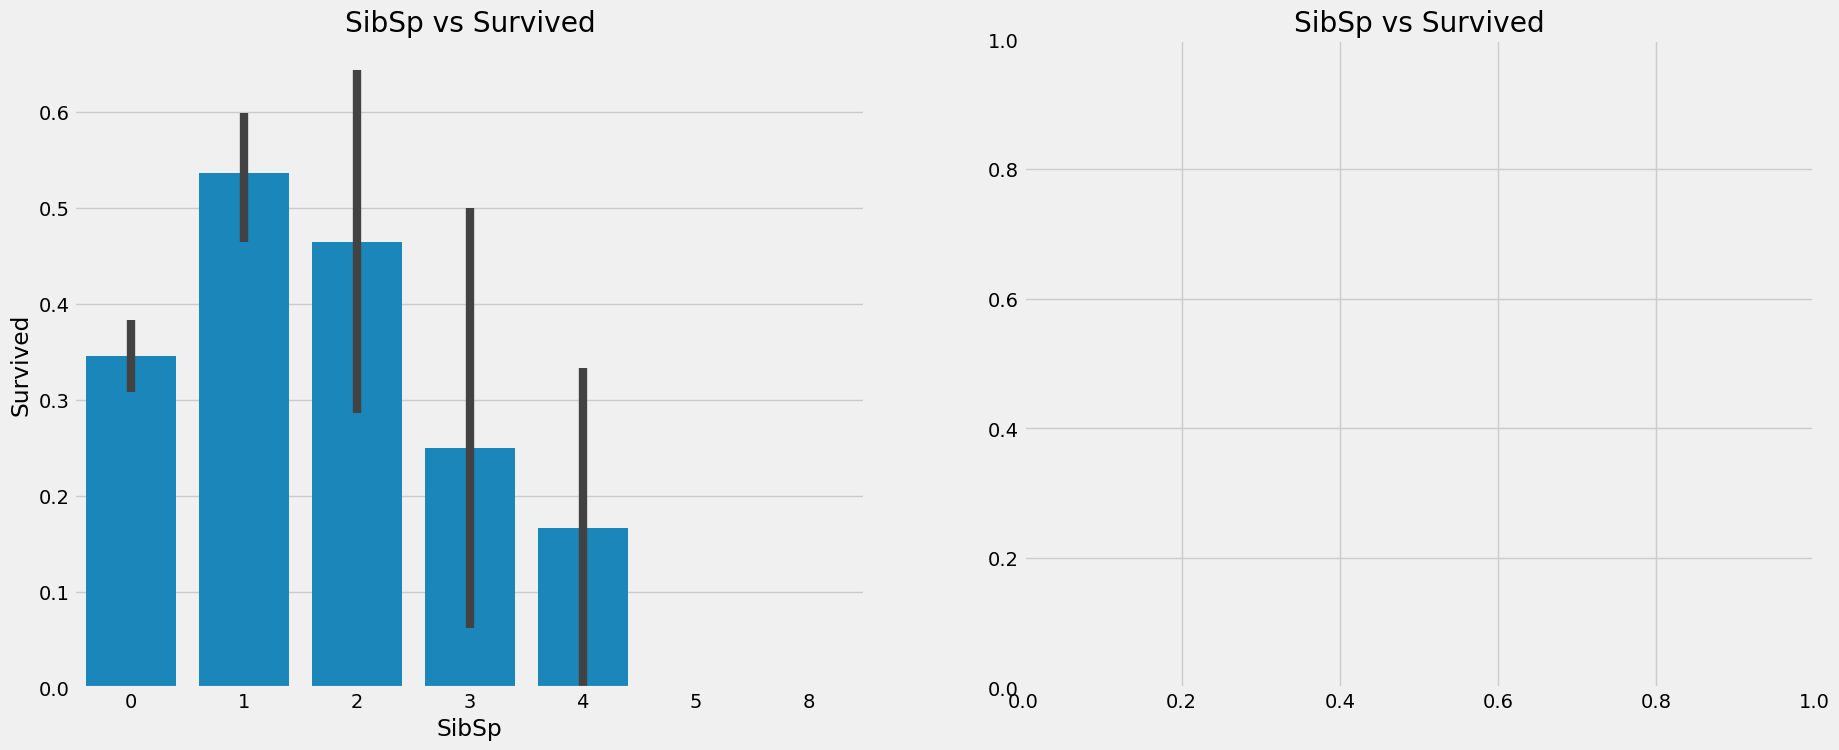

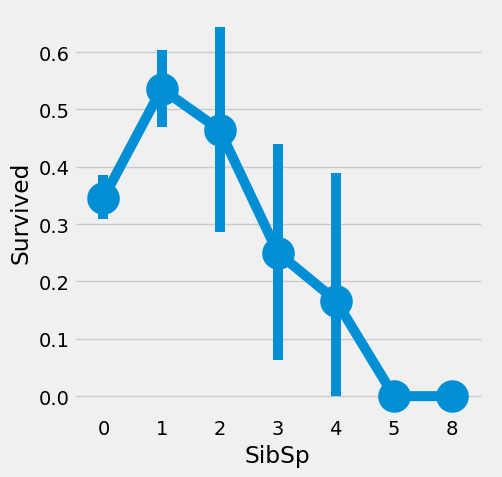

In [258]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.catplot(x='SibSp', y='Survived', data=data, kind='point')
ax[1].set_title('SibSp vs Survived')

# plt.close(2) Ïù¥Í±∏ ÌïòÎ©¥ catplot Í∑∏ÎûòÌîÑ Ï∂úÎ†•Ïù¥ Ïïà Îê®
plt.show()

In [259]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

üìå Observations (Í¥ÄÏ∞∞ ÎÇ¥Ïö©)  
- ÌòïÏ†úÏûêÎß§Ïùò ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº ÏÉùÏ°¥Ïú®ÏùÄ ÎåÄÏ≤¥Î°ú Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§.
ÎÜÄÎûçÍ≤åÎèÑ ÌòïÏ†úÏûêÎß§Í∞Ä 5Î™ÖÏóêÏÑú 8Î™ÖÏù∏ Í∞ÄÏ°±Ïùò ÏÉùÏ°¥Ïú®ÏùÄ Ìù¨Î∞ïÌïòÎã§.
Í∑∏ Ïù¥Ïú†Îäî ÏïÑÎßàÎèÑ **Pclass** ÎïåÎ¨∏Ïùº Ïàò ÏûàÎã§.
- ÍµêÏ∞®ÌëúÎ•º Î≥¥Î©¥, **SibSp**Í∞Ä 4 Ïù¥ÏÉÅÏùò ÏÇ¨ÎûåÎì§ÏùÄ Î™®Îëê **Pclass 3**Ïóê ÏÜçÌïú ÏäπÍ∞ùÎì§Ïù¥Îã§.
Í∑∏ÎûòÏÑú Pclass 3Ïóê ÏÜçÌïú ÎåÄÍ∞ÄÏ°±Îì§Ïù¥ ÎåÄÎ∂ÄÎ∂Ñ ÏÇ¨ÎßùÌñàÎã§Îäî ÏÇ¨Ïã§ÏùÄ Î™ÖÎ∞±ÌïòÎã§.

## Parch
#### Ìï®Íªò ÌÉëÏäπÌïú Î∂ÄÎ™® ÎòêÎäî ÏûêÎÖÄ Ïàò

In [260]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

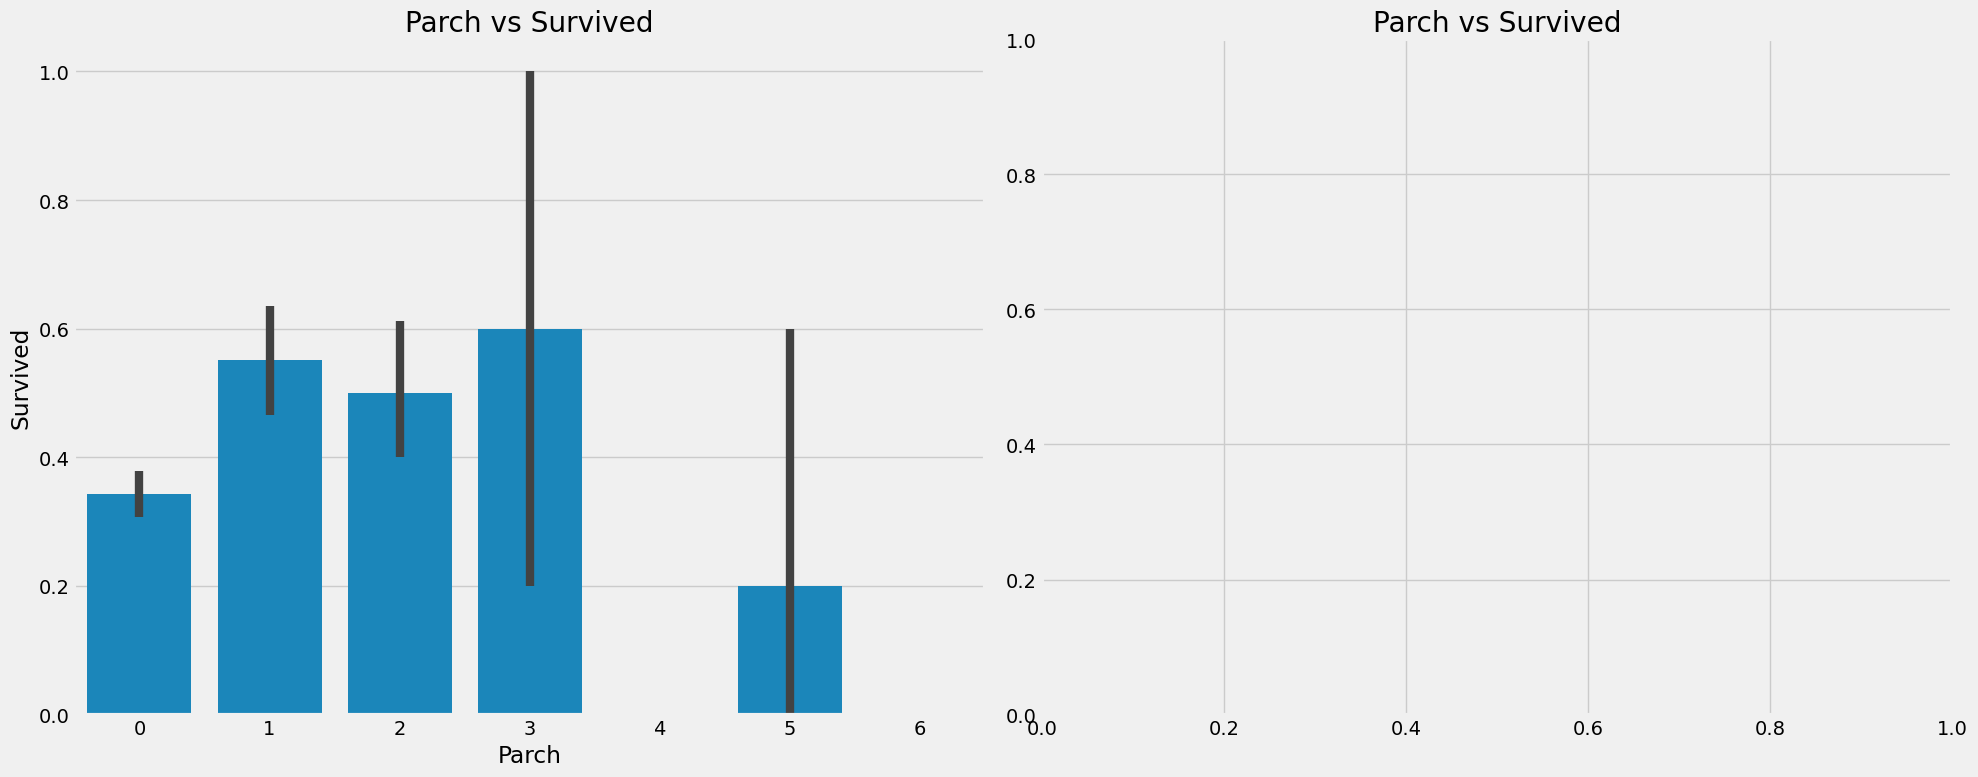

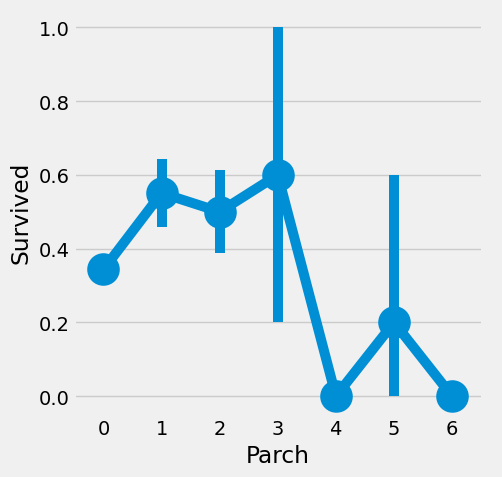

In [261]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.catplot(x='Parch',y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('Parch vs Survived')

f.tight_layout()
# plt.close(2)
plt.show()

üìå Observations (Í¥ÄÏ∞∞ ÎÇ¥Ïö©)
  
Î∂ÄÎ™®ÏôÄ Ìï®Íªò ÏäπÏÑ†Ìïú ÏäπÍ∞ùÎì§ÏùÄ ÏÉùÏ°¥ Í∞ÄÎä•ÏÑ±Ïù¥ Îçî ÎÜíÎã§.  
Í∑∏Îü¨ÎÇò Î∂ÄÎ™®Ïùò ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÉùÏ°¥ Í∞ÄÎä•ÏÑ±ÏùÄ Í∞êÏÜåÌïúÎã§.  
  
Î∂ÄÎ™®Í∞Ä 1~3Î™Ö ÏûàÎäî Í≤ΩÏö∞ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÜíÎã§.  
Î∞òÎ©¥, ÌòºÏûê ÏûàÎäî Í≤ΩÏö∞ÏóêÎäî ÏÉùÏ°¥ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÍ≥†, 4Î™Ö Ïù¥ÏÉÅÏùò Î∂ÄÎ™®ÏôÄ Ìï®Íªò ÏûàÎäî Í≤ΩÏö∞ÏóêÎäî ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎçîÏö± Í∞êÏÜåÌïúÎã§.

## Fare--> Continous Feature

In [262]:
print('Highest Fare was: ',data['Fare'].max(),)
print('Lowest Fare was: ',data['Fare'].min())
print('Average Fare was: ',round(data['Fare'].mean(), 2))

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2


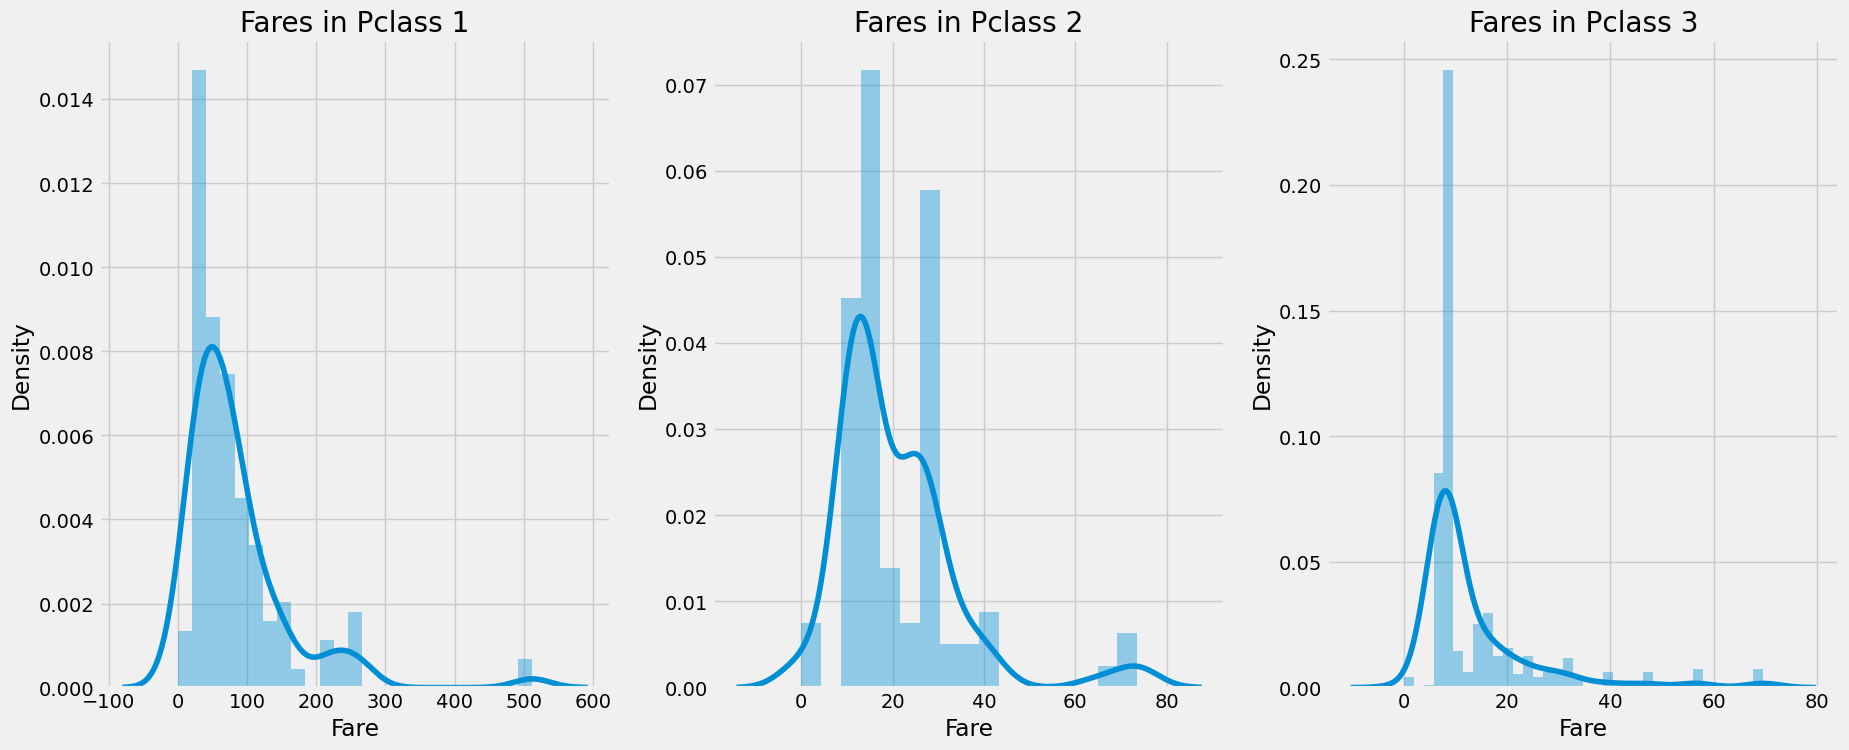

In [263]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### üìå **Í¥ÄÏ∞∞ ÎÇ¥Ïö©**:
- **Fare Distribution**: **Pclass1** ÏäπÍ∞ùÎì§Ïùò ÏöîÍ∏à Î∂ÑÌè¨Í∞Ä Îß§Ïö∞ ÎÑìÍ≥†, Ïù¥ Î∂ÑÌè¨Îäî Í≥ÑÍ∏âÏù¥ ÎÇÆÏïÑÏßàÏàòÎ°ù Í∞êÏÜåÌïúÎã§.  
ÏöîÍ∏àÏùÄ Ïó∞ÏÜçÏ†ÅÏù∏ Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê **Binning**ÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥Î•º Ïù¥ÏÇ∞Ï†ÅÏù∏ Í∞íÏúºÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÎã§.  
  
### **Î™®Îì† ÌäπÏÑ±Ïóê ÎåÄÌïú ÌïµÏã¨ Í¥ÄÏ∞∞**:

- **Sex**: Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÇ®ÏÑ±Ïóê ÎπÑÌï¥ ÎÜíÎã§.
  
- **Pclass**: 1Îì±ÏÑù ÏäπÍ∞ùÏù¥ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Îçî ÎÜíÏùÄ Í≤ΩÌñ•Ïù¥ ÏûàÎã§.  
**Pclass3**Ïùò ÏÉùÏ°¥Ïú®ÏùÄ Îß§Ïö∞ ÎÇÆÎã§.  
Ïó¨ÏÑ±Ïùò Í≤ΩÏö∞ **Pclass1**ÏóêÏÑú ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Í±∞Ïùò 1Ïóê Í∞ÄÍπåÏö∞Î©∞, **Pclass2**ÏóêÏÑúÎèÑ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÜíÎã§.  
ÎèàÏù¥ Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïúÎã§!
  
- **Age**: 5-10ÏÑ∏ ÎØ∏ÎßåÏùò Ïñ¥Î¶∞Ïù¥Îäî ÎÜíÏùÄ ÏÉùÏ°¥ ÌôïÎ•†ÏùÑ Î≥¥ÏòÄÎã§. 15ÏÑ∏ÏóêÏÑú 35ÏÑ∏ ÏÇ¨Ïù¥Ïùò ÏäπÍ∞ùÏùÄ ÎßéÏùÄ ÏàòÍ∞Ä ÏÇ¨ÎßùÌñàÎã§. 
  
- **Embarked**: **C**ÏóêÏÑú ÏäπÍ∞ùÎì§Ïùò ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Îçî ÎÜíÏïÑ Î≥¥Ïù∏Îã§. Ïù¥Îäî **Pclass1** ÏäπÍ∞ùÏùò ÎåÄÎ∂ÄÎ∂ÑÏù¥ **S**ÏóêÏÑú ÌÉîÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Í∑∏Î†áÎã§. **Q** Ìï≠Íµ¨ÏóêÏÑú ÏäπÍ∞ùÎì§ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ **Pclass3**Ïóê ÏÜçÌñàÎã§.
  
- **Parch + SibSp**: 1-2Î™ÖÏùò ÌòïÏ†úÏûêÎß§ÎÇò Î∞∞Ïö∞Ïûê, ÎòêÎäî 1-3Î™ÖÏùò Î∂ÄÎ™®Í∞Ä Ìï®Íªò ÏäπÏÑ†Ìïú Í≤ΩÏö∞ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Îçî ÎÜíÎã§.
  Î∞òÎ©¥, ÌòºÏûê ÏûàÍ±∞ÎÇò ÎåÄÍ∞ÄÏ°±ÏùÑ ÎèôÎ∞òÌïú Í≤ΩÏö∞ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÇÆÎã§.


Ïó∞ÏÜçÏ†ÅÏù∏ Í∞íÏùÑ BinningÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥ÏÇ∞Ï†ÅÏù∏ Í∞íÏúºÎ°ú Î≥ÄÌôòÌïúÎã§Îäî Ï†êÏùÑ ÏòàÏãúÎ°ú Ïù¥Ìï¥Ìï¥Î≥¥Î†§ Ï∞æÏïÑÎ≥¥ÏïòÎã§.
  
ÏòàÏãú)  
ÏöîÍ∏à(Fare) Í∞íÏù¥ 10, 20, 35, 50, 100 Îì±ÏúºÎ°ú Îß§Ïö∞ Îã§ÏñëÌïú Í≤ΩÏö∞, BinningÏùÑ ÏÇ¨Ïö©Ìï¥ 0-50, 50-100, 100 Ïù¥ÏÉÅÏúºÎ°ú ÎÇòÎàÑÎ©¥  
Î∂ÑÏÑùÌï† Îïå Îçî Î™ÖÌôïÌïú Í≤ΩÌñ•ÏùÑ Î≥º Ïàò ÏûàÎã§.

## Correlation Between The Features

In [264]:
# data

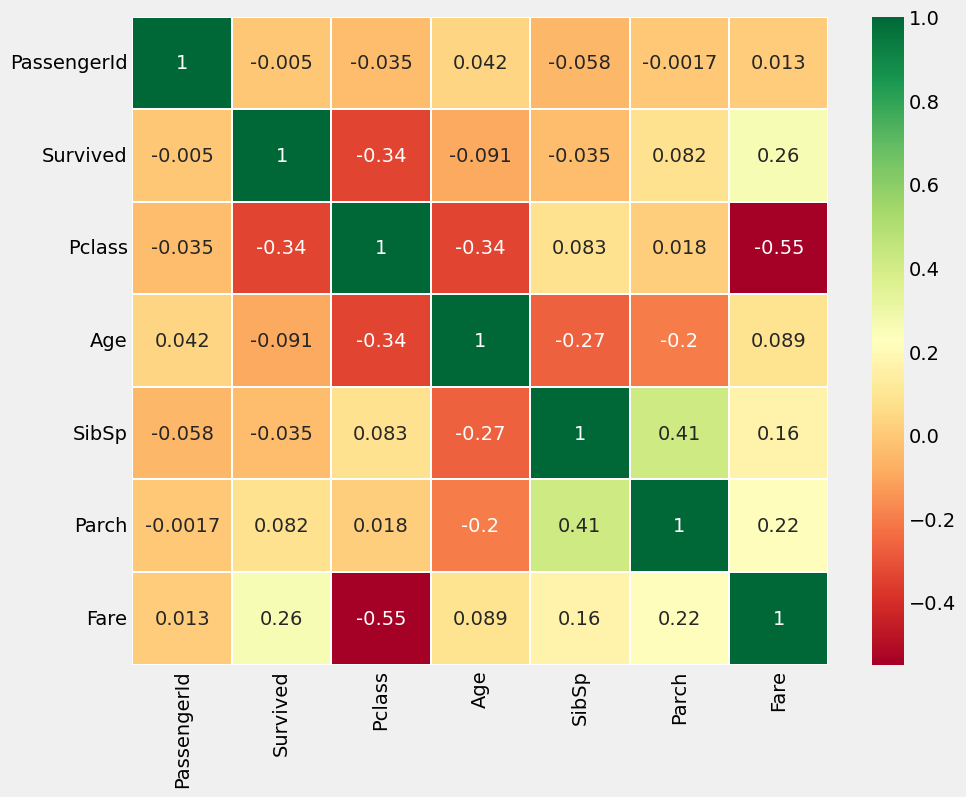

In [265]:
numeric_data = data.select_dtypes(include=['number']) # corr()Ìï† Îïå objectÌòïÎèÑ ÏûàÏúºÎØÄÎ°ú error Î∞úÏÉù

sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) # annot=True ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌëúÏãú
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

üîç ÏÉÅÍ¥Ä ÌñâÎ†¨(Heatmap) Ìï¥ÏÑù  
Ïö∞ÏÑ† Ï£ºÎ™©Ìï† Ï†êÏùÄ, ÏÉÅÍ¥Ä ÌñâÎ†¨ÏùÄ Ïà´ÏûêÌòï ÌäπÏÑ±(numeric features)Îßå ÎπÑÍµêÌïúÎã§Îäî Í≤ÉÏù¥Îã§.  
ÏïåÌååÎ≤≥Ïù¥ÎÇò Î¨∏ÏûêÏó¥ÏùÄ ÏàòÏπòÏ†ÅÏúºÎ°ú ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.  
  
ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Ïù¥Ìï¥ÌïòÍ∏∞ Ï†ÑÏóê, Î®ºÏ†Ä ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Î¨¥ÏóáÏù∏ÏßÄ ÏßöÍ≥† ÎÑòÏñ¥Í∞ÄÍ≤†Îã§.  
‚úÖ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Positive Correlation)  
ÌäπÏÑ± AÍ∞Ä Ï¶ùÍ∞ÄÌï† Îïå ÌäπÏÑ± BÎèÑ Ï¶ùÍ∞ÄÌïúÎã§Î©¥, Îëê ÌäπÏÑ±ÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÏûàÎã§Í≥† Î≥∏Îã§.  
Í∞íÏù¥ 1Ïù¥Î©¥ ÏôÑÎ≤ΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏùòÎØ∏ÌïúÎã§.  
  
‚ùå ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Negative Correlation)  
ÌäπÏÑ± AÍ∞Ä Ï¶ùÍ∞ÄÌï† Îïå ÌäπÏÑ± BÎäî Í∞êÏÜåÌïúÎã§Î©¥, Îëê ÌäπÏÑ±ÏùÄ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÏûàÎã§Í≥† Î≥∏Îã§.  
Í∞íÏù¥ -1Ïù¥Î©¥ ÏôÑÎ≤ΩÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏùòÎØ∏ÌïúÎã§.  


üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Multicollinearity)  
ÎßåÏïΩ Îëê ÌäπÏÑ±Ïù¥ Îß§Ïö∞ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§Î©¥, Ìïú ÌäπÏÑ±Ïùò Î≥ÄÌôîÍ∞Ä Îã§Î•∏ ÌäπÏÑ±Ïùò Î≥ÄÌôîÏóê Í±∞Ïùò ÎèôÏùºÌïòÍ≤å Î∞òÏòÅÎêúÎã§Îäî ÏùòÎØ∏Îã§.  
Ï¶â, Îëê ÌäπÏÑ± Î™®Îëê Í±∞Ïùò ÎèôÏùºÌïú Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏúºÎ©∞, Ï†ïÎ≥¥Ïùò Îã§ÏñëÏÑ±(Î∂ÑÏÇ∞)Ïù¥ Î∂ÄÏ°±ÌïòÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.  
  
Ïù¥Îü¨Ìïú ÌòÑÏÉÅÏùÑ **Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Multicollinearity)**Ïù¥ÎùºÍ≥† ÌïúÎã§.  
Îëê ÌäπÏÑ±Ïù¥ Í±∞Ïùò Í∞ôÏùÄ Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Í∑∏Ï§ë ÌïòÎÇòÎäî Ï§ëÎ≥µÎêú Í≤ÉÏúºÎ°ú Í∞ÑÏ£ºÎêòÎ©∞, Î™®Îç∏ ÌïôÏäµ Ïãú Ï†úÍ±∞ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§.

## Part2: Feature Engineering and Data Cleaning

üîß Feature Engineering(ÌäπÏÑ± Í≥µÌïô)Ïù¥ÎûÄ?  
Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïó¨Îü¨ ÌäπÏÑ±Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§Í≥† Ìï¥ÏÑú, Í∑∏ Î™®Îì† ÌäπÏÑ±Ïù¥ Î∞òÎìúÏãú Ï§ëÏöîÌïú Í≤ÉÏùÄ ÏïÑÎãàÎã§.  
ÎßéÏùÄ ÌäπÏÑ±Îì§ Ï§ëÏóêÎäî Ï§ëÎ≥µÎêòÍ±∞ÎÇò Î∂àÌïÑÏöîÌïú ÌäπÏÑ±Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏúºÎ©∞, Ïù¥Îü∞ ÌäπÏÑ±Îì§ÏùÄ Ï†úÍ±∞ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§.  
  
ÎòêÌïú, Í∏∞Ï°¥Ïùò ÌäπÏÑ±ÏóêÏÑú ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ Ï∂îÏ∂úÌïòÍ±∞ÎÇò ÎßåÎì§Ïñ¥ÎÇº ÏàòÎèÑ ÏûàÎã§.   
ÏòàÎ•º Îì§Ïñ¥, Name ÌäπÏÑ±ÏóêÏÑú Initials(Ïù¥ÎãàÏÖú)Í≥º Í∞ôÏùÄ ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ ÎèÑÏ∂úÌï† Ïàò ÏûàÎã§.  
  
Feature EngineeringÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏûëÏóÖÏùÑ Ìè¨Ìï®ÌïúÎã§:  

- Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ ÌäπÏÑ± Ï†úÍ±∞
- Ïú†ÏùòÎØ∏Ìïú ÏÉàÎ°úÏö¥ ÌäπÏÑ± ÏÉùÏÑ±
- ÏòàÏ∏° Î™®Îç∏ÎßÅÏóê Ï†ÅÌï©ÌïòÎèÑÎ°ù Í∏∞Ï°¥ ÌäπÏÑ± Î≥ÄÌôò  
  
Ïù¥Ï†ú Ïñ¥Îñ§ ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ ÎßåÎì§ Ïàò ÏûàÍ≥†, Ïñ¥Îñ§ ÌäπÏÑ±ÏùÑ Ï†úÍ±∞Ìï† Ïàò ÏûàÏùÑÏßÄ ÏÇ¥Ìé¥Î≥¥Í≤†Îã§.  
ÎòêÌïú ÏòàÏ∏° Î™®Îç∏ÎßÅÏùÑ ÏúÑÌï¥ ÌòÑÏû¨ ÏÇ¨Ïö© Ï§ëÏù∏ ÌäπÏÑ±Îì§ÏùÑ Îçî Ï†ÅÏ†àÌïú ÌòïÌÉúÎ°ú Î≥ÄÌôòÌï† Í≤ÉÏù¥Îã§.

## Age_band

üîß **Feature Engineering**Ïù¥ÎûÄ?  
Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå, Î™®Îì† ÌäπÏÑ±Ïù¥ Ìï≠ÏÉÅ Ï§ëÏöîÌïú Í≤ÉÏùÄ ÏïÑÎãàÎã§.  
Ï§ëÎ≥µÎêòÍ±∞ÎÇò Î∂àÌïÑÏöîÌïú ÌäπÏÑ±ÏùÄ Ï†úÍ±∞Ìï¥Ïïº ÌïòÎ©∞,  
Îã§Î•∏ ÌäπÏÑ±ÏóêÏÑú Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÍ±∞ÎÇò Í¥ÄÏ∞∞ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ ÏÉùÏÑ±Ìï† ÏàòÎèÑ ÏûàÎã§.  
  
ÏòàÎ•º Îì§Ïñ¥, Name(Ïù¥Î¶Ñ)ÌäπÏÑ±ÏóêÏÑú Initials(Ïù¥ÎãàÏÖú)Ïù¥ÎùºÎäî ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ Ï∂îÏ∂úÌïòÎäî Í≤ÉÏù¥ Í∑∏ ÏòàÏãúÏù¥Îã§.  
  
Ïù¥Ï†ú Î∂àÌïÑÏöîÌïú ÌäπÏÑ±ÏùÑ Ï†úÍ±∞ÌïòÍ≥†, ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ ÏÉùÏÑ±ÌïòÍ±∞ÎÇò,  
Í∏∞Ï°¥Ïùò ÌäπÏÑ±Îì§ÏùÑ ÏòàÏ∏° Î™®Îç∏ÎßÅÏóê Ï†ÅÌï©Ìïú ÌòïÌÉúÎ°ú Î≥ÄÌôò(transform)Ìï¥Î≥¥Ïûê.

In [266]:
# vectorÌôî
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  33.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked Initial  Age_band  
0      0         A/5 21171   7.2500   NaN        S      Mr         1  
1      0          PC 17599  71.2833   C85        C     Mrs         2  
2      0  STON/O2. 3101282   7.9250   NaN        S    Miss         1  
3      0            113803  53.1000  C123        S     Mrs         2  
4      0            373450   8.0500   NaN        S      Mr         2  
5      0            330877   8.4583   NaN        Q      Mr         2  
6      0             17463  51.8625   E46        S      Mr         3  
7      1            349909  21.0750   NaN        S  Master         0  
8      2            347742  11.1333   NaN        S     Mrs         1  
9      0            237736  30.0708   NaN        C     Mrs         0

In [267]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passenegers in each band

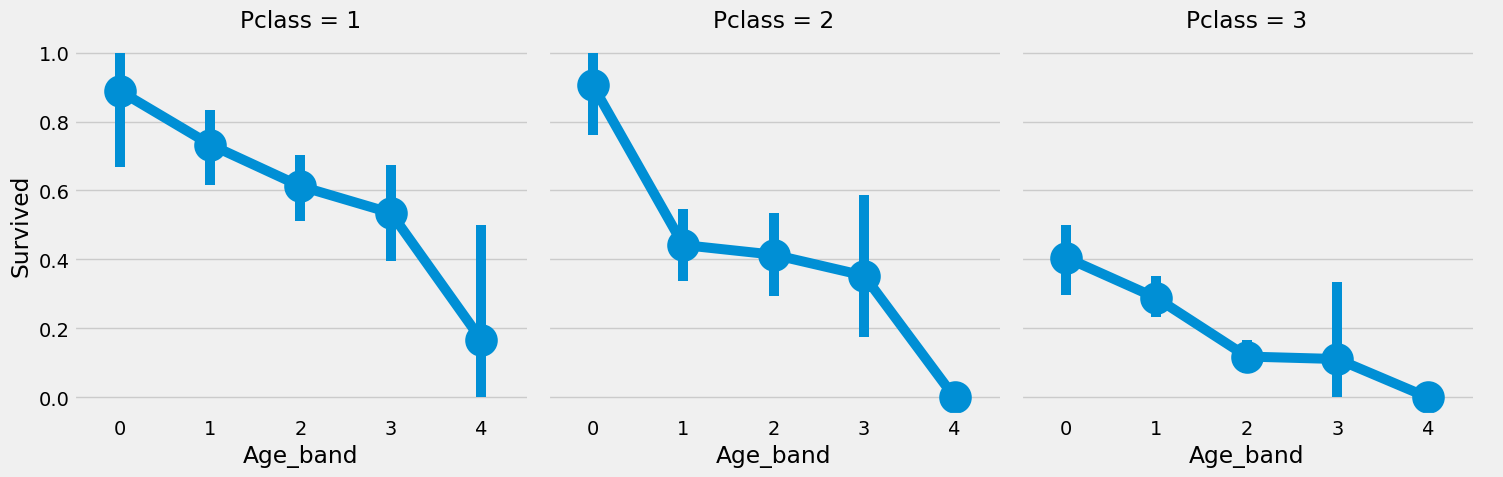

In [268]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

### Family_SizeÏôÄ Alone

Ïù¥Ï†ú **Family_Size**ÏôÄ **Alone**Ïù¥ÎùºÎäî ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏùÑ ÏÉùÏÑ±Ìï¥ÏÑú Î∂ÑÏÑùÌï† Ïàò ÏûàÎã§.  
**Family_Size**Îäî **Parch**ÏôÄ **SibSp**Ïùò Ìï©ÏúºÎ°ú, ÏäπÍ∞ùÏùò Í∞ÄÏ°± ÌÅ¨Í∏∞Î•º ÎÇòÌÉÄÎÇ∏Îã§.  
Ïù¥ Í∞íÏùÑ ÌÜµÌï¥ ÏäπÍ∞ùÏùò Í∞ÄÏ°± ÌÅ¨Í∏∞ÏôÄ ÏÉùÏ°¥Ïú® Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌï† Ïàò ÏûàÎã§.  
**Alone**ÏùÄ ÏäπÍ∞ùÏù¥ ÌòºÏûê ÌÉëÏäπÌñàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌäπÏÑ±ÏúºÎ°ú, ÏäπÍ∞ùÏù¥ ÌòºÏûêÏù∏ÏßÄ ÏïÑÎãåÏßÄÎ•º ÌôïÏù∏ÌïòÎäî Îç∞ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

Ïù¥ ÌäπÏÑ±Îì§ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏäπÍ∞ùÏù¥ Í∞ÄÏ°±Í≥º Ìï®Íªò ÌÉëÏäπÌñàÏùÑ Îïå ÏÉùÏ°¥Ïú®Ïóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ Î∂ÑÏÑùÌï† Ïàò ÏûàÎã§.



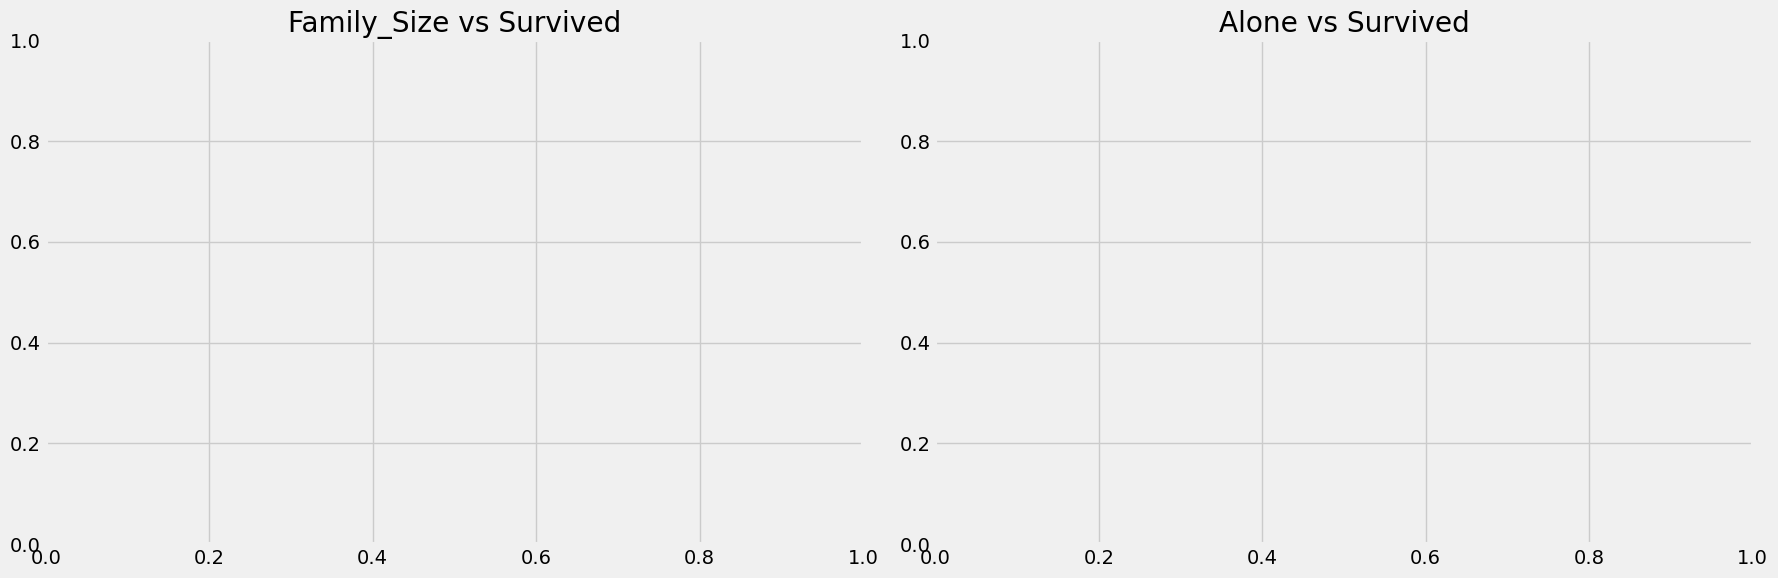

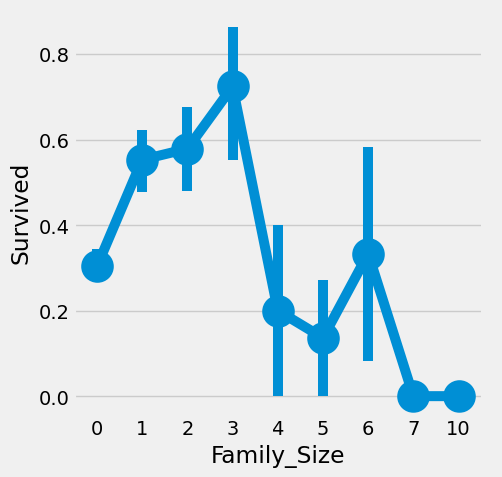

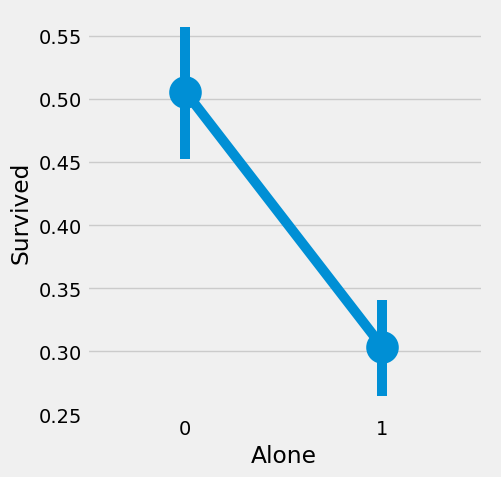

In [269]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] # family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1 # Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.catplot(x='Family_Size',y='Survived',data=data,ax=ax[0],kind='point')
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone',y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)
f.tight_layout()
plt.show()

### Family_Size

**Family_Size**Í∞Ä 0Ïù¥Î©¥ ÏäπÍ∞ùÏù¥ ÌòºÏûê ÏûàÎã§Îäî ÎúªÏù¥Îã§.  
Î™ÖÌôïÌïòÍ≤åÎèÑ, ÌòºÏûê ÏûàÍ±∞ÎÇò **Family_Size = 0**Ïùº Í≤ΩÏö∞ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÎÇÆÎã§.  
Í∞ÄÏ°± ÌÅ¨Í∏∞Í∞Ä 4Î™Ö Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ÏóêÎèÑ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÇÆÏïÑÏßÑÎã§.  
Ïù¥ ÌäπÏÑ±ÏùÄ Î™®Îç∏ÏóêÏÑú Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§. Ï¢Ä Îçî ÏûêÏÑ∏Ìûà Î∂ÑÏÑùÌï¥Î≥¥Ïûê.


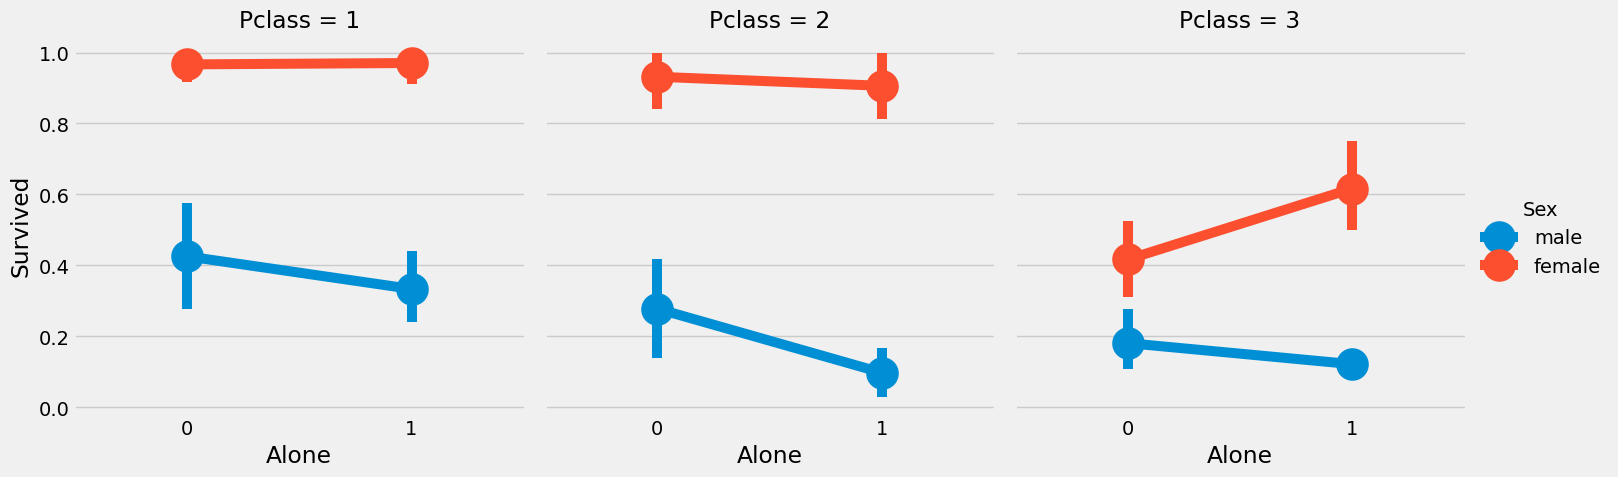

In [270]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

ÌòºÏûê ÏûàÎäî Í≤ÉÏù¥ **Sex**ÎÇò **Pclass**ÏôÄ ÏÉÅÍ¥ÄÏóÜÏù¥ Ìï¥Î°≠Îã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.
- ÌòºÏûê ÏûàÏúºÎ©¥ ÏÑ±Î≥ÑÏù¥ÎÇò PClass ÏÉÅÍ¥ÄÏóÜÏù¥ Ïôú Ìï¥Î°úÏö¥ÏßÄ Î™®Î•¥Í≤†Îã§. ÏÉùÏ°¥Ïú®Ïù¥ ÎÜíÏùÄÎç∞..?

  
Îã®, **Pclass 3**ÏóêÏÑúÎäî ÌòºÏûê ÏûàÎäî Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ Í∞ÄÏ°±Í≥º Ìï®Íªò ÏûàÎäî Ïó¨ÏÑ±Î≥¥Îã§ ÎÜíÎã§.

## Fare_Range

ÏöîÍ∏à(Fare)ÎèÑ Ïó∞ÏÜçÏ†ÅÏù∏ ÌäπÏÑ±Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, Ïù¥Î•º ÏàúÏÑúÌòï Í∞í(Ordinal Value)ÏúºÎ°ú Î≥ÄÌôòÌï¥Ïïº ÌïúÎã§.  
Ïù¥Î•º ÏúÑÌï¥ `pandas.qcut`ÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§.

qcutÏùÄ Ïö∞Î¶¨Í∞Ä ÏßÄÏ†ïÌïú Í∞úÏàòÏùò Íµ¨Í∞Ñ(Îπà)ÏúºÎ°ú Í∞íÏùÑ ÎÇòÎààÎã§.  
ÏòàÎ•º Îì§Ïñ¥, 5Í∞úÏùò ÎπàÏùÑ ÏßÄÏ†ïÌïòÎ©¥, qcutÏùÄ Í∞íÏùÑ Í∑†Îì±ÌïòÍ≤å Î∂ÑÌï†ÌïòÏó¨ 5Í∞úÏùò Íµ¨Í∞Ñ ÎòêÎäî Í∞í Î≤îÏúÑÎ°ú ÎÇòÎààÎã§.

Ïù¥ Î∞©ÏãùÏùÄ Ïó∞ÏÜçÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Í∞ÑÎ≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Î™®Îç∏Ïóê Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.

In [271]:
data['Fare'].min()

0.0

In [272]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)

In [273]:
data['Fare_Range'].value_counts()
# qcut()ÏùÄ Í∑†Îì±ÌïòÍ≤å Îç∞Ïù¥ÌÑ∞Í∞Ä Îì§Ïñ¥Í∞ÄÎèÑÎ°ù Íµ¨Í∞ÑÏùÑ ÎÇòÎààÎã§.

Fare_Range
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

In [274]:
data.groupby(['Fare_Range'])['Survived'].mean()
# Fare_RangeÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ ÏÉùÏ°¥Ïú® ÌôïÏù∏

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [275]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

Fare_RangeÎäî ÌòÑÏû¨ Íµ¨Í∞Ñ ÌòïÌÉúÎ°ú ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Î™®Îç∏Ïóê Î∞îÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÎã§.  
Í∑∏ÎûòÏÑú Í∞Å Íµ¨Í∞ÑÏùÑ Ïà´Ïûê Í∞íÏúºÎ°ú Î≥ÄÌôòÌï¥Ïïº ÌïúÎã§.  
Age_BandÏ≤òÎüº Íµ¨Í∞ÑÏùÑ ÌäπÏ†ï Í∞íÏúºÎ°ú Î∞îÍæºÎã§.  
ÏòàÎ•º Îì§Ïñ¥, Í∞Å Íµ¨Í∞ÑÏùò ÌèâÍ∑†Í∞íÏù¥ÎÇò Ï§ëÍ∞ÑÍ∞íÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

In [276]:
# Î≤îÏúÑÎ•º Î™ÖÌôïÌïòÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÏñ¥Ïïº ÌïúÎã§.
# ÏïÑÎûò ÏΩîÎìúÎäî ÏõêÌïòÎäî Í≤∞Í≥ºÎ•º ÏñªÏßÄ Î™ªÌïúÎã§.

# data['Fare_Cat'] = 0
# data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
# data.loc[data['Fare'] <= 14.454, 'Fare_cat'] = 1
# data.loc[data['Fare'] <= 31.0, 'Fare_cat'] = 2
# data.loc[data['Fare'] <= 512.329, 'Fare_cat'] = 3

In [277]:
# sns.catplot(x= 'Fare_cat', y='Survived',data=data,hue='Sex', kind='point')
# plt.show()

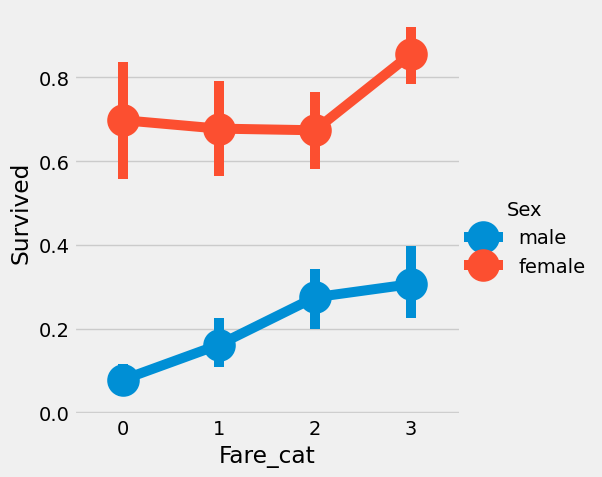

In [278]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.catplot(x= 'Fare_cat', y='Survived',data=data,hue='Sex', kind='point')
plt.show()

ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥ ÌôïÎ•†  
Î™ÖÌôïÌûà ÎßêÌïòÏûêÎ©¥, Fare_catÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÉùÏ°¥ ÌôïÎ•†ÎèÑ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.  
Ïù¥ ÌäπÏÑ±ÏùÄ Î™®Îç∏ÎßÅ Í≥ºÏ†ïÏóêÏÑú Ï§ëÏöîÌïú ÌäπÏÑ±Ïù¥ Îê† Ïàò ÏûàÎã§.  
SexÏôÄ Ìï®Íªò ÏÇ¨Ïö©ÌïòÎ©¥ Î™®Îç∏ ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÎã§.

## Converting String Values into Numeric
### Î¨∏ÏûêÏó¥ Í∞íÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ∏∞

Í∏∞Í≥Ñ ÌïôÏäµ Î™®Îç∏ÏóêÏÑúÎäî Î¨∏ÏûêÏó¥ Í∞íÏùÑ ÏßÅÏ†ë ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê, Sex, Embarked Îì±Ïùò ÌäπÏÑ±ÏùÑ Ïà´Ïûê Í∞íÏúºÎ°ú Î≥ÄÌôòÌï¥Ïïº ÌïúÎã§.  
Ïù¥Î•º ÏúÑÌï¥ Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÄ ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding) ÎòêÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©(One-Hot Encoding)Ïù¥Îã§.
  
- ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding): Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞íÏùÑ Í≥†Ïú†Ìïú Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎäî Î∞©ÏãùÏù¥Îã§.
- Ïõê-Ìï´ Ïù∏ÏΩîÎî©(One-Hot Encoding): Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞íÏùÑ ÏÉàÎ°úÏö¥ Ïù¥ÏßÑ ÌäπÏÑ±(0 ÎòêÎäî 1)ÏùÑ ÎßåÎì§Ïñ¥ ÌëúÌòÑÌïòÎäî Î∞©ÏãùÏù¥Îã§.

In [279]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features

- Name ‚Üí Ïù¥Î¶Ñ ÌäπÏÑ±ÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞íÏúºÎ°ú Î≥ÄÌôòÌï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê ÌïÑÏöîÌïòÏßÄ ÏïäÎã§.

- Age ‚Üí ÎÇòÏù¥Îäî Age_band ÌäπÏÑ±ÏúºÎ°ú ÎåÄÏ≤¥Ìï† Ïàò ÏûàÏúºÎØÄÎ°ú ÌïÑÏöîÌïòÏßÄ ÏïäÎã§.

- Ticket ‚Üí Ìã∞Ïºì Î≤àÌò∏Îäî ÎûúÎç§Ìïú Î¨∏ÏûêÏó¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ÌôîÌï† Ïàò ÏóÜÎã§.

- Fare ‚Üí Fare_cat ÌäπÏÑ±Ïù¥ ÏûàÏúºÎØÄÎ°ú Ï§ëÎ≥µÎêú ÌäπÏÑ±Ïù¥Îã§.

- Cabin ‚Üí NaN Í∞íÏù¥ ÎßéÍ≥†, Ïó¨Îü¨ Í∞ùÏã§ÏùÑ Í∞ÄÏßÑ ÏäπÍ∞ùÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î∂ÑÏÑùÏóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§.

- Fare_Range ‚Üí Fare_cat ÌäπÏÑ±Ïù¥ ÏûàÏúºÎØÄÎ°ú Î∂àÌïÑÏöîÌïòÎã§.

- PassengerId ‚Üí Ïù¥ ÌäπÏÑ±ÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ÌôîÌï† Ïàò ÏóÜÏúºÎØÄÎ°ú ÌïÑÏöî ÏóÜÎã§.

In [280]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

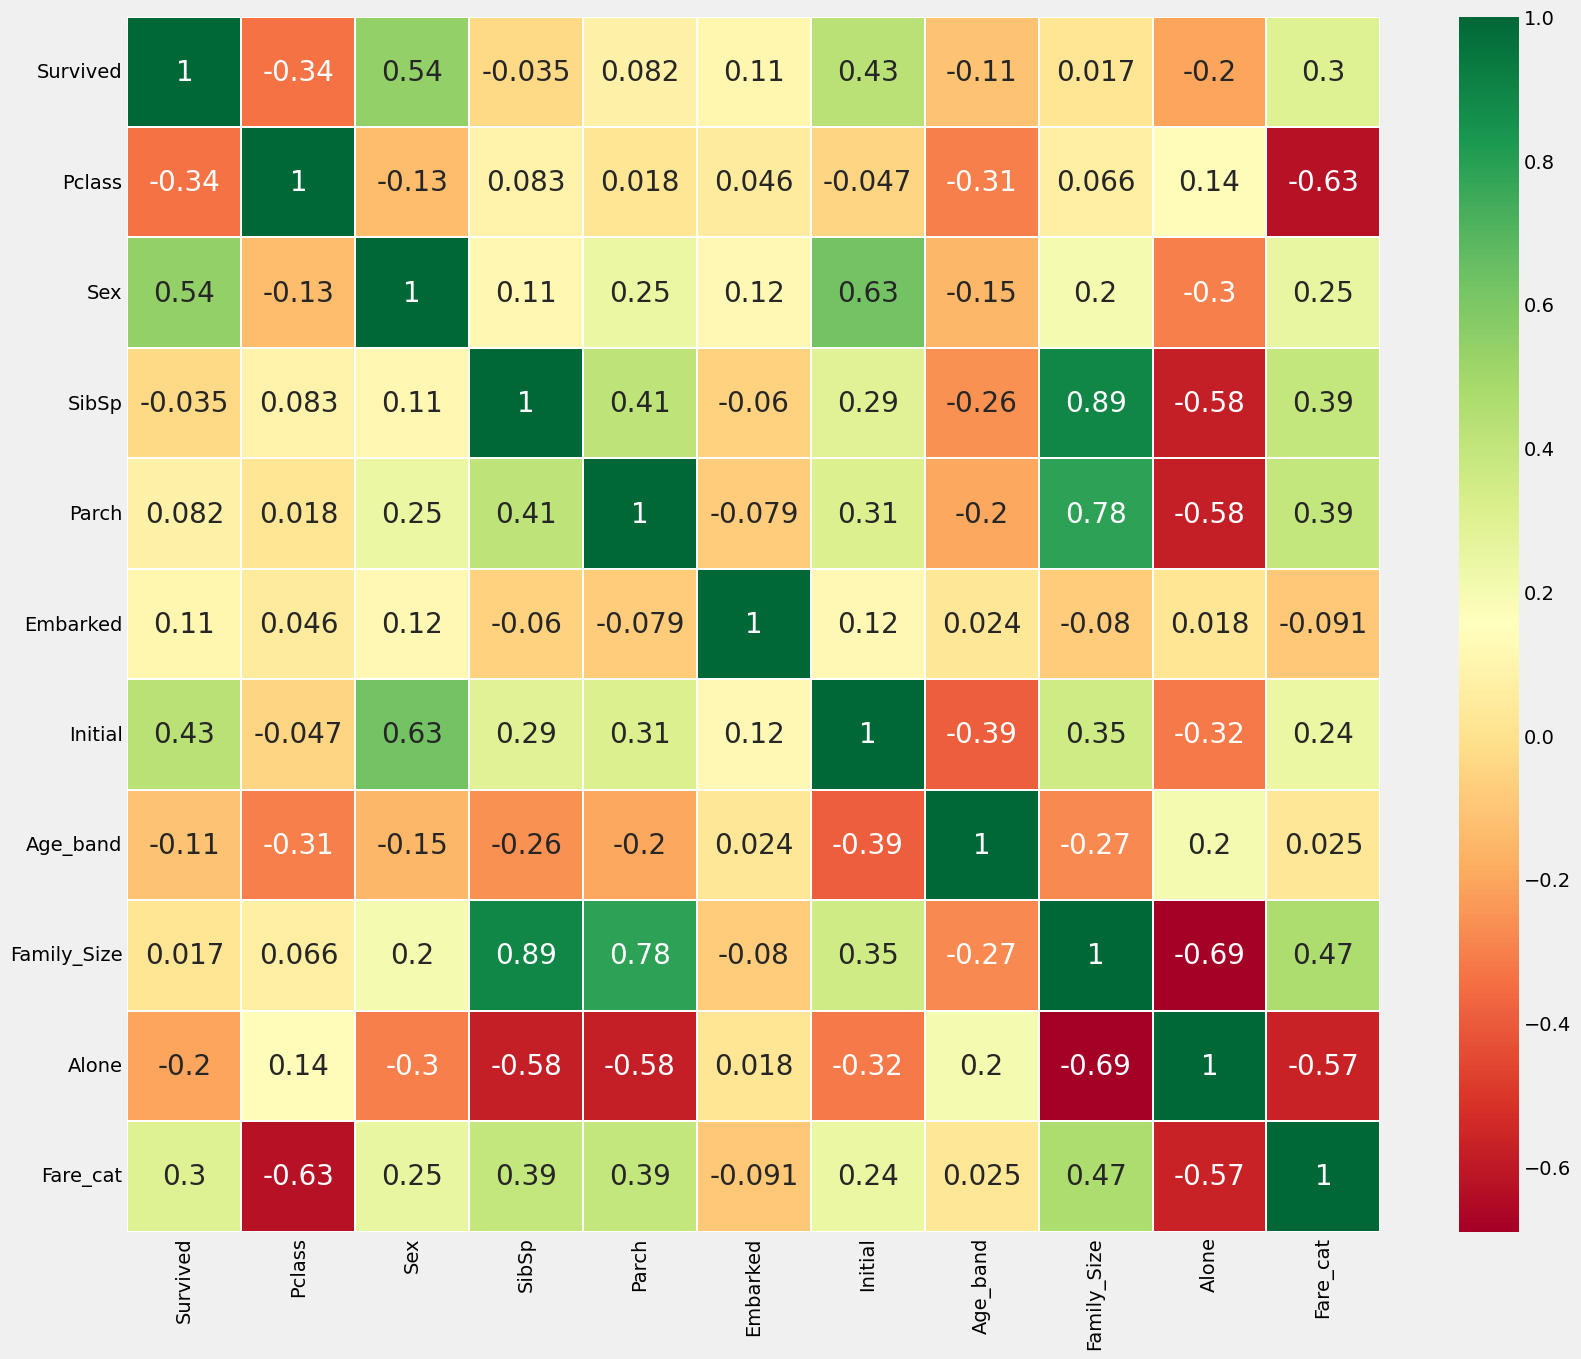

In [281]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

SibSp and Family_Size, Famil_Size and ParchÎäî ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÎã§.  
Î∞òÎ©¥Ïóê Alone and Family_SizeÎäî ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÇÆÎã§.

## Part3: ÏòàÏ∏° Î™®Îç∏ÎßÅ
Ïö∞Î¶¨Îäî EDA(ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù)ÏóêÏÑú ÏùºÎ∂Ä ÌÜµÏ∞∞ÏùÑ ÏñªÏóàÏßÄÎßå, Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏäπÍ∞ùÏù¥ ÏÉùÏ°¥Ìï†ÏßÄ ÏÇ¨ÎßùÌï†ÏßÄ Ï†ïÌôïÌûà ÏòàÏ∏°Ìï† ÏàòÎäî ÏóÜÎã§.  
Ïù¥Ï†ú Ïö∞Î¶¨Îäî Î™á Í∞ÄÏßÄ ÌõåÎ•≠Ìïú Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏäπÍ∞ùÏùò ÏÉùÏ°¥ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°Ìï† Í≤ÉÏù¥Îã§. ÏÇ¨Ïö©Îê† ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§:  

- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Logistic Regression)

- ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã† (SVM) - ÏÑ†Ìòï Î∞è ÎπÑÏÑ†Ìòï (Radial)

- ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ (Random Forest)

- K-ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ (K-Nearest Neighbours)

- ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à (Naive Bayes)

- Í≤∞Ï†ï Ìä∏Î¶¨ (Decision Tree)

- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Logistic Regression)  
  
Ïù¥ ÏïåÍ≥†Î¶¨Ï¶òÎì§ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏäπÍ∞ùÏù¥ ÏÉùÏ°¥Ìï† ÌôïÎ•†ÏùÑ ÏòàÏ∏°ÌïòÍ≥† Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ¨ Í≤ÉÏù¥Îã§.

In [282]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [284]:
# Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎÇòÎààÎã§. 
# test_size=0.3: Îç∞Ïù¥ÌÑ∞Ïùò 30%Î•º ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ 70%Î•º ÌõàÎ†® ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©
# random_state=0: ÎûúÎç§ ÏãúÎìúÎ•º Í≥†Ï†ïÏãúÏºú ÎèôÏùºÌïú Î∂ÑÌï†ÏùÑ Ïú†ÏßÄ
# stratify=data['Survived']: 'Survived' Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†ÌïòÏó¨ ÏÉùÏ°¥ÏûêÏôÄ ÏÇ¨ÎßùÏûêÏùò ÎπÑÏú®ÏùÑ Ïú†ÏßÄ
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

# ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú ÎèÖÎ¶Ω Î≥ÄÏàò(features)Îßå Ï∂îÏ∂ú (Survived Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÎì§)
train_X = train[train.columns[1:]]
# ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú Ï¢ÖÏÜç Î≥ÄÏàò(target)Ïù∏ 'Survived'Îßå Ï∂îÏ∂ú
train_Y = train[train.columns[:1]]

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú ÎèÖÎ¶Ω Î≥ÄÏàò(features)Îßå Ï∂îÏ∂ú (Survived Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÎì§)
test_X = test[test.columns[1:]]
# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ï¢ÖÏÜç Î≥ÄÏàò(target)Ïù∏ 'Survived'Îßå Ï∂îÏ∂ú
test_Y = test[test.columns[:1]]

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 'Survived' Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú Î™®Îì† ÌäπÏÑ±ÏùÑ Ï∂îÏ∂ú (X: ÎèÖÎ¶Ω Î≥ÄÏàòÎì§)
X = data[data.columns[1:]]
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 'Survived' Ïª¨ÎüºÎßå Ï∂îÏ∂ú (Y: Ï¢ÖÏÜç Î≥ÄÏàò)
Y = data['Survived']


### Logistic Regression

In [296]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Support Vector Machines(Linear and radial)

Linear Support Vector Machine(linear-SVM) ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨ Í∞ÄÎä•Ìïú Í≤ΩÏö∞Ïóê ÏÇ¨Ïö©

In [297]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2_1=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2_1,test_Y))

Accuracy for linear SVM is 0.8171641791044776


Radial Support Vector Machines(rbf-SVM)
ÎπÑÏÑ†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäî Îç∞ ÏÇ¨Ïö©

In [298]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2_2=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2_2,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Ï∞®Ïù¥Ï†ê Ï†ïÎ¶¨
#### Ïª§ÎÑê Ï¢ÖÎ•ò

- Linear SVM: kernel='linear'
- RBF SVM: kernel='rbf'

#### Í∏∞Îä•

- Linear SVMÏùÄ ÏÑ†Ìòï Î∂ÑÎ¶¨ Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©.
- RBF SVMÏùÄ ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©.

### Random Forest

In [299]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


### K-Nearest Neighbours

In [300]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the KNN is 0.8134328358208955


KNeighborsClassifierÏùò n_neighbors Í∞íÏùÑ Ïó¨Îü¨ Í∞úÎ°ú Î∞îÍøîÍ∞ÄÎ©¥ÏÑú Ï†ïÌôïÎèÑÎ•º ÌôïÏù∏

```
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())
```

ÏµúÍ∑º pandas Î≤ÑÏ†ÑÏóêÏÑú .append() Î©îÏÑúÎìúÍ∞Ä ÏÇ≠Ï†úÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïúÎã§.  
  
üîß Ìï¥Í≤∞ Î∞©Î≤ï  
Series.append() ÎåÄÏã† pd.concat()ÏùÑ Ïì∞Î©¥ ÎêúÎã§.

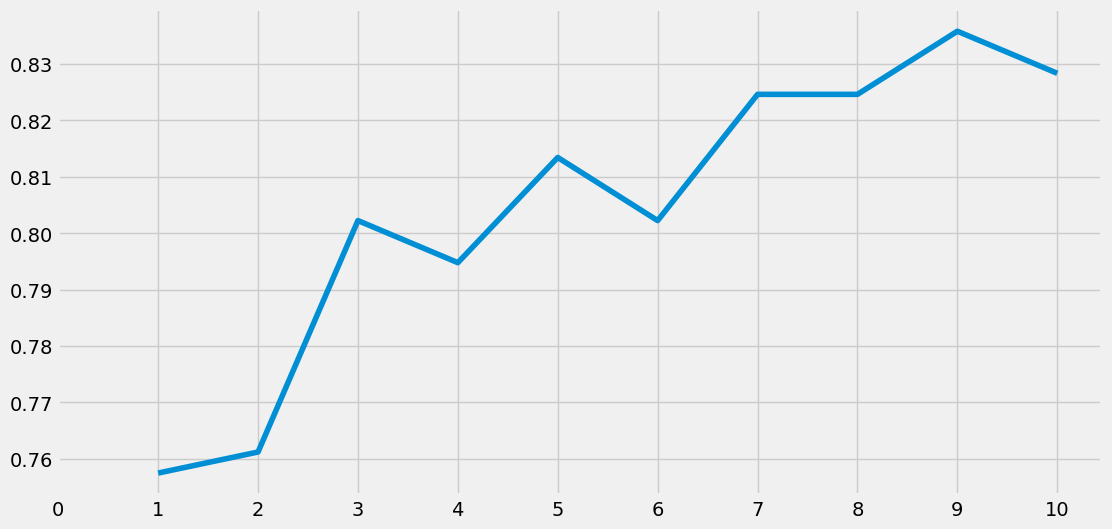

Í∞Å kÍ∞íÏóê ÎåÄÌïú Ï†ïÌôïÎèÑ: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821]
ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.835820895522388 ÏµúÍ≥† Ï†ïÌôïÎèÑÎ•º ÎÇ∏ Ïù¥ÏõÉ Ïàò(k): 9


In [325]:
# append ->concat Î∞îÍæ∏Î©¥ Ï∂úÎ†• Í≤∞Í≥ºÍ∞Ä Ï°∞Í∏à Îã§Î•¥Í≤å ÎÇòÏò¥


a_index = list(range(1, 11))  # 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ
a = pd.Series()               # Îπà ÏãúÎ¶¨Ï¶à ÏÉùÏÑ±
x = list(range(0, 11))        # xÏ∂ï ÎààÍ∏à

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    
    # Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞Ìï¥ÏÑú ÏãúÎ¶¨Ï¶àÏóê Ï∂îÍ∞Ä
    accuracy = metrics.accuracy_score(prediction, test_Y)
    a = pd.concat([a, pd.Series([accuracy])])

# Ï†ïÌôïÎèÑ ÏãúÍ∞ÅÌôî
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print("Í∞Å kÍ∞íÏóê ÎåÄÌïú Ï†ïÌôïÎèÑ:", a.values)
print("ÏµúÍ≥† Ï†ïÌôïÎèÑ:", a.values.max(), "ÏµúÍ≥† Ï†ïÌôïÎèÑÎ•º ÎÇ∏ Ïù¥ÏõÉ Ïàò(k):", a_index[a.values.argmax()])


### Naive Bayes

In [301]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Decision Tree

In [302]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


Î™®Îç∏ Ï†ïÌôïÎèÑÎßåÏúºÎ°úÎäî Í∞ïÎ†•Ìïú Î∂ÑÎ•òÍ∏∞ÎùºÍ≥† Ìï† Ïàò ÏóÜÎã§.  
Î™®Îç∏Ïù¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÌïòÍ≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌÖåÏä§Ìä∏Ìï¥ÏÑú Ï†ïÌôïÎèÑ 90%Î•º ÏñªÏóàÎã§Í≥† Ìï¥Î≥¥Ïûê.  
  
Ïù¥Í±¥ ÏñºÌïè Î≥¥Î©¥ ÍΩ§ Ï¢ãÏùÄ ÏÑ±Îä•Ï≤òÎüº Î≥¥Ïù¥ÏßÄÎßå, ÏïûÏúºÎ°ú Îì§Ïñ¥Ïò¨ ÏÉàÎ°úÏö¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÎì§ÏóêÏÑúÎèÑ Í≥ÑÏÜç 90%Î•º Ïú†ÏßÄÌï† Ïàò ÏûàÏùÑÍπå?  
Ï†ïÎãµÏùÄ ÏïÑÎãàÎã§.  
  
ÏôúÎÉêÎ©¥ Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï†ÏßÄÏóê Îî∞Îùº Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßà Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.  
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Î∞îÎÄåÎ©¥ Ï†ïÌôïÎèÑÎèÑ Ïò§Î•¥ÎùΩÎÇ¥Î¶¨ÎùΩÌï† Ïàò ÏûàÎã§.  
Ïù¥Îü∞ Í±∏ **Î™®Îç∏ Î∂ÑÏÇ∞**(variance)Ïù¥ÎùºÍ≥† ÌïúÎã§.  
  
Í∑∏Îüº Ïù¥Í±∏ Ïñ¥ÎñªÍ≤å Ìï¥Í≤∞Ìï†Íπå?  
Î∞îÎ°ú **ÍµêÏ∞® Í≤ÄÏ¶ù**(Cross Validation)ÏùÑ ÏÇ¨Ïö©ÌïúÎã§.  
  
Ïù¥ Î∞©Î≤ïÏùÑ Ïì∞Î©¥ Îç∞Ïù¥ÌÑ∞Î•º Ïó¨Îü¨ Î≤à ÎÇòÎà†ÏÑú ÌïôÏäµ/ÌÖåÏä§Ìä∏Î•º Î∞òÎ≥µÌïòÍ≥†, Í∑∏ ÌèâÍ∑† ÏÑ±Îä•ÏùÑ Î≥¥Îäî Î∞©ÏãùÏù¥Îã§.  
Ïù¥Î†áÍ≤å ÌïòÎ©¥ Ïö∞Ïó∞Ïóê ÏùòÌïú ÏÑ±Îä• Ìé∏Ï∞®Î•º Ï§ÑÏù¥Í≥†, ÏùºÎ∞òÌôîÎêú(generalized) Î™®Îç∏ÏùÑ ÎßåÎì§ Ïàò ÏûàÎã§.  
  
ÌïÑÏöîÌïòÎ©¥ Cross Validation ÏΩîÎìúÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Ïûê.